# Text Analysis in Python 4: Topics & Emotions

<h1 style="text-align:center;font-size:300%;">The Union is... scared??</h1> 
  <img src="https://api.time.com/wp-content/uploads/2016/07/emoticons.jpg?quality=85&w=600" style="width:%80;">
  <!--<img src="http://www.languagetrainers.com/blog/wp-content/uploads/2012/10/us-are-vs-us-is1.png" style="width:%140;">-->



## Topic Modeling, Sentiment Analysis, and other Inductive Approaches to Text Analysis

To what extent can text analysis approaches identify topics, emotions, and other aspects of texts without any prior input by the researcher?

In this session, participants will:
+ learn what sentiment analysis and topic modeling can and can't do
+ modify and interpret a series of sentiment analysis graphs
+ briefly experiment with topic modeling while examining its limits

<!--
*Explain Topic Modeling / Give Examples Of (both good and bad)
Present Buckets of Words Examples and have students interpret
Apply Topic Modeling to SOTU Texts (does it make sense to do so? it certainly would be interesting to see which SOTU addresses are lumped in with which others)
Compare to out-of-the-box approaches (Voyant, etc.)*-->

## Structure of Notebooks

These Jupyter Notebooks are designed to integrate instructions and explanations (in the white "markdown" cells below) with hands-on practice with the code (in the gray "code" cells below). To add, modify, or delete cells, please use the Menu above (especially under the Edit, Insert, and Cell tabs) or click ESC + H to see a list of keyboard shortcuts.

<h3 style="color:green">Code Together:</h3><p style="color:green">In these cell blocks, we will code together. You can find the completed version in our shared folder (ending with "_completed.ipynb").</p>

<h3 style="color:blue;">Exercises:</h3><p style="color:blue">are in blue text. These are a chance to practice what you have learned.</p>

<h3 style="color:purple">Python Basics - Additional Practice</h3><p style="color:purple">are in purple text. Work on these after the lesson if you would like more practice.</p>

In [2]:
import pathlib, os, re, nltk, gensim
import pandas as pd, numpy as np
import matplotlib
import matplotlib.pyplot as plt, seaborn as sns

from pathlib import Path

nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
# from tqdm import tqdm_notebook as tqdm
from tqdm import notebook as tqdm
from tqdm import trange
from nltk import tokenize

plt.style.use('fivethirtyeight')
#%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9] 
#%config InteractiveShellApp.matplotlib = 'inline'
#%config InlineBackend.figure_formats = ['svg']




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\F0040RP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#sotudf=pd.read_csv(Path(Path.cwd().parent,"state-of-the-union-dataset","sotudf.tsv"),encoding = "utf-8",sep="\t")
sotudir = Path(Path.cwd().parent,"state-of-the-union-dataset","txt")
sotudf = pd.read_csv(Path(sotudir.parent,"sotudf.tsv"),encoding="utf-8",sep="\t",index_col=0)

## Sentiment Analysis

[describe sentiment analysis]

The code used here was borrowed from https://github.com/raffg/harry_potter_nlp/blob/master/sentiment_analysis.ipynb.

In [4]:
#p = Path.cwd()
#p2 = p.parent
#sotudir = Path(p2,"state-of-the-union-dataset","txt")
print(Path.cwd())

print(sotudir)
pathlist = sotudir.glob("*.txt")
for path in pathlist:
    print(path)




C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\topics-and-emotions
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1790_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1791_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1792_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1793_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1794_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1795_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1796_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1797_Adams.txt
C:\Users\F0040RP\Documents

2. Here, we will read a dataframe we created storing some metadata, the full text, and a tokenized list for each SOTU address (remember we created something similar in Lesson 2 "Counting Words", Step 16b).

In [5]:

sotudf.head()

pres  year  numtoks  \
0  Washington  1790        0   
1  Washington  1791     2314   
2  Washington  1792     2104   
3  Washington  1793     1973   
4  Washington  1794     2918   

                                              tokens  \
0                                                 []   
1  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
2  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
3  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
4  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   

                                            fulltext  
0                                                NaN  
1  Fellow-Citizens of the Senate and House of Rep...  
2  Fellow-Citizens of the Senate and House of Rep...  
3  Fellow-Citizens of the Senate and House of Rep...  
4  Fellow-Citizens of the Senate and House of Rep...



3. Next, we will create a new column in our SOTU dataframe to store the full text of each address after processing each a bit further.

In [6]:
print(sotudf.iloc[1]['fulltext'][:400],"\n***\n")

Fellow-Citizens of the Senate and House of Representatives:

"In vain may we expect peace with the Indians on our frontiers so long as a
lawless set of unprincipled wretches can violate the rights of hospitality,
or infringe the most solemn treaties, without receiving the punishment they
so justly merit."

I meet you upon the present occasion with the feelings which are naturally
inspired by a str 
***



In [7]:
#sotudf.iloc[0]['fulltext']
#sotudf.fulltext.apply(type)
print(sotudf.shape)
sotudf = sotudf[sotudf['fulltext']!=""]
print(sotudf.shape)
sotudf = sotudf[sotudf['fulltext'].notnull()]
print(sotudf.shape)

(228, 5)
(228, 5)
(227, 5)


In [8]:
sotudf['text_processed'] = sotudf['fulltext'].map(lambda x: re.sub('[,\.!?\"]', '', x)) #removes common punctuation
print(sotudf.iloc[0]['text_processed'][:400],"\n***\n")


Fellow-Citizens of the Senate and House of Representatives:

In vain may we expect peace with the Indians on our frontiers so long as a
lawless set of unprincipled wretches can violate the rights of hospitality
or infringe the most solemn treaties without receiving the punishment they
so justly merit

I meet you upon the present occasion with the feelings which are naturally
inspired by a strong i 
***



In [9]:
sotudf['text_processed'] = sotudf['text_processed'].map(lambda x: x.lower())
print(sotudf.iloc[0]['text_processed'][:400],"\n***\n")

fellow-citizens of the senate and house of representatives:

in vain may we expect peace with the indians on our frontiers so long as a
lawless set of unprincipled wretches can violate the rights of hospitality
or infringe the most solemn treaties without receiving the punishment they
so justly merit

i meet you upon the present occasion with the feelings which are naturally
inspired by a strong i 
***



In [10]:
sotudf.head()

pres  year  numtoks  \
1  Washington  1791     2314   
2  Washington  1792     2104   
3  Washington  1793     1973   
4  Washington  1794     2918   
5  Washington  1795     1988   

                                              tokens  \
1  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
2  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
3  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
4  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   
5  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...   

                                            fulltext  \
1  Fellow-Citizens of the Senate and House of Rep...   
2  Fellow-Citizens of the Senate and House of Rep...   
3  Fellow-Citizens of the Senate and House of Rep...   
4  Fellow-Citizens of the Senate and House of Rep...   
5  Fellow-Citizens of the Senate and House of Rep...   

                                      text_processed  
1  fellow-citizens of the senate and house of rep...  
2  fellow-citizens of the senate and house of rep...  
3  fellow-citizens of the senate and house of rep...  
4  fellow-citizens of the senate and house of rep...  
5  fellow-citizens of the senate and house of rep...

In [11]:
def text_emotion(df, column):
    '''
    Takes a DataFrame and a specified column of text and adds 10 columns to the
    DataFrame for each of the 10 emotions in the NRC Emotion Lexicon, with each
    column containing the value of the text in that emotion
    INPUT: DataFrame, string
    OUTPUT: the original DataFrame with ten new columns
    '''

    new_df = df.copy()
    # new_df = sotudf2.copy()

    # filepath = ('data/'
    #             'NRC-Sentiment-Emotion-Lexicons/'
    #             'NRC-Emotion-Lexicon-v0.92/'
    #             'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
    
    #filepath = "C:/Users/F0040RP/Documents/Python_Scripts/sentimentAnalysis/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"
    filepath = Path('NRC-Emotion-Lexicon','NRC-Emotion-Lexicon-Wordlevel-v0.92.txt')
    
    emolex_df = pd.read_csv(filepath,
                            names=["word", "emotion", "association"],
                            sep='\t')
    emolex_words = emolex_df.pivot(index='word',
                                   columns='emotion',
                                   values='association').reset_index()
    
    emotions = emolex_words.columns.drop('word')
    emo_df = pd.DataFrame(0, index=df.index, columns=emotions)
    # emo_df = pd.DataFrame(0,index=sotudf2.index, columns = emotions)
    stemmer = SnowballStemmer("english")

    
    president = ''
    year = ''
    
    with tqdm.tqdm(total=len(list(new_df.iterrows()))) as pbar:
        for i, row in new_df.iterrows():
            pbar.update(1)
            if row['pres'] != president:
                print(row['pres'])
                president = row['pres']
            if row['year'] != year:
                print('   ', row['year'])
                year = row['year']
                # chap = row['year']
            document = word_tokenize(new_df.loc[i][column])
            for word in document:
                word = stemmer.stem(word.lower())
                emo_score = emolex_words[emolex_words.word == word]
                if not emo_score.empty:
                    for emotion in list(emotions):
                        emo_df.at[i, emotion] += emo_score[emotion]

    new_df = pd.concat([new_df, emo_df], axis=1)

    return new_df

# the below takes a long time, 1:26 on my cpu!

In [12]:
sotusub = sotudf.iloc[-2:]

In [15]:
sotusub2 = text_emotion(sotusub, 'fulltext')
print(sotusub2)
#sotudf2 = text_emotion(sotudf,'fulltext')  
## just create a sample version - maybe 3 texts



  0%|          | 0/3 [00:00<?, ?it/s]

Obama
    2016
Trump
    2017
    2018
      pres  year  numtoks                                             tokens  \
225  Obama  2016     5628  ['Mr', 'Speaker', 'Mr', 'Vice', 'President', '...   
226  Trump  2017     5095  ['Thank', 'you', 'very', 'much', 'Mr', 'Speake...   
227  Trump  2018     5204  ['Mr', 'Speaker', 'Mr', 'Vice', 'President', '...   

                                              fulltext  \
225  Mr. Speaker, Mr. Vice President, Members of Co...   
226  Thank you very much. Mr. Speaker, Mr. Vice Pre...   
227  Mr. Speaker, Mr. Vice President, Members of Co...   

                                        text_processed  anger  anticipation  \
225  mr speaker mr vice president members of congre...     77           124   
226  thank you very much mr speaker mr vice preside...     72           134   
227  mr speaker mr vice president members of congre...     85           138   

     disgust  fear  joy  negative  positive  sadness  surprise  trust  
225       31    97

Let's take a look what this new dataset looks like:

In [16]:
#sotudf2.head()

NameError: name 'sotudf2' is not defined

WindowsPath('C:/Users/F0040RP/Documents/DartLib_RDS/textAnalysis/topics-and-emotions')

In [16]:
#sotunrc = sotudf2.drop(["fulltext","text_processed"],axis=1)
#sotunrc.to_csv("sotu_nrc.csv",encoding = "utf-8")

In [19]:
#then load nrc sentiment analysis results
sotunrc2=pd.read_csv("sotu_nrc.csv",encoding = "utf-8")

In [18]:
#sotunrc2 = sotunrc.copy()

NameError: name 'sotunrc' is not defined

In [20]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
for emotion in emotions:
    sotunrc2[emotion] = sotunrc2[emotion] / sotunrc2['numtoks']
sotunrc2.head()

Unnamed: 0        pres  year  numtoks  \
0           1  Washington  1791     2314   
1           2  Washington  1792     2104   
2           3  Washington  1793     1973   
3           4  Washington  1794     2918   
4           5  Washington  1795     1988   

                                              tokens     anger  anticipation  \
0  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...  0.004754      0.023768   
1  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...  0.006654      0.024240   
2  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...  0.007603      0.023315   
3  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...  0.016107      0.021590   
4  ['Fellow', 'Citizens', 'of', 'the', 'Senate', ...  0.011066      0.030181   

    disgust      fear       joy  negative  positive   sadness  surprise  \
0  0.003457  0.007347  0.016422  0.018150  0.050562  0.009075  0.007779   
1  0.003802  0.011882  0.017110  0.024715  0.052757  0.009981  0.008080   
2  0.007096  0.014192  0.016726  0.025849  0.050684  0.010137  0.007603   
3  0.007882  0.018506  0.015079  0.030843  0.054832  0.013708  0.008568   
4  0.009054  0.015091  0.022636  0.028672  0.062374  0.015091  0.013078   

      trust  
0  0.038462  
1  0.056559  
2  0.044602  
3  0.043180  
4  0.046781

In [21]:
sotunrc2.to_csv("sotu_nrc_pct.csv", encoding = "utf-8")

In [ ]:
#if I need to add back in dropped columns (["text","text_processed","word_count"])
#sotudf3 = pd.merge(sotudf,sotunrc,how="inner",on=["year","president"])

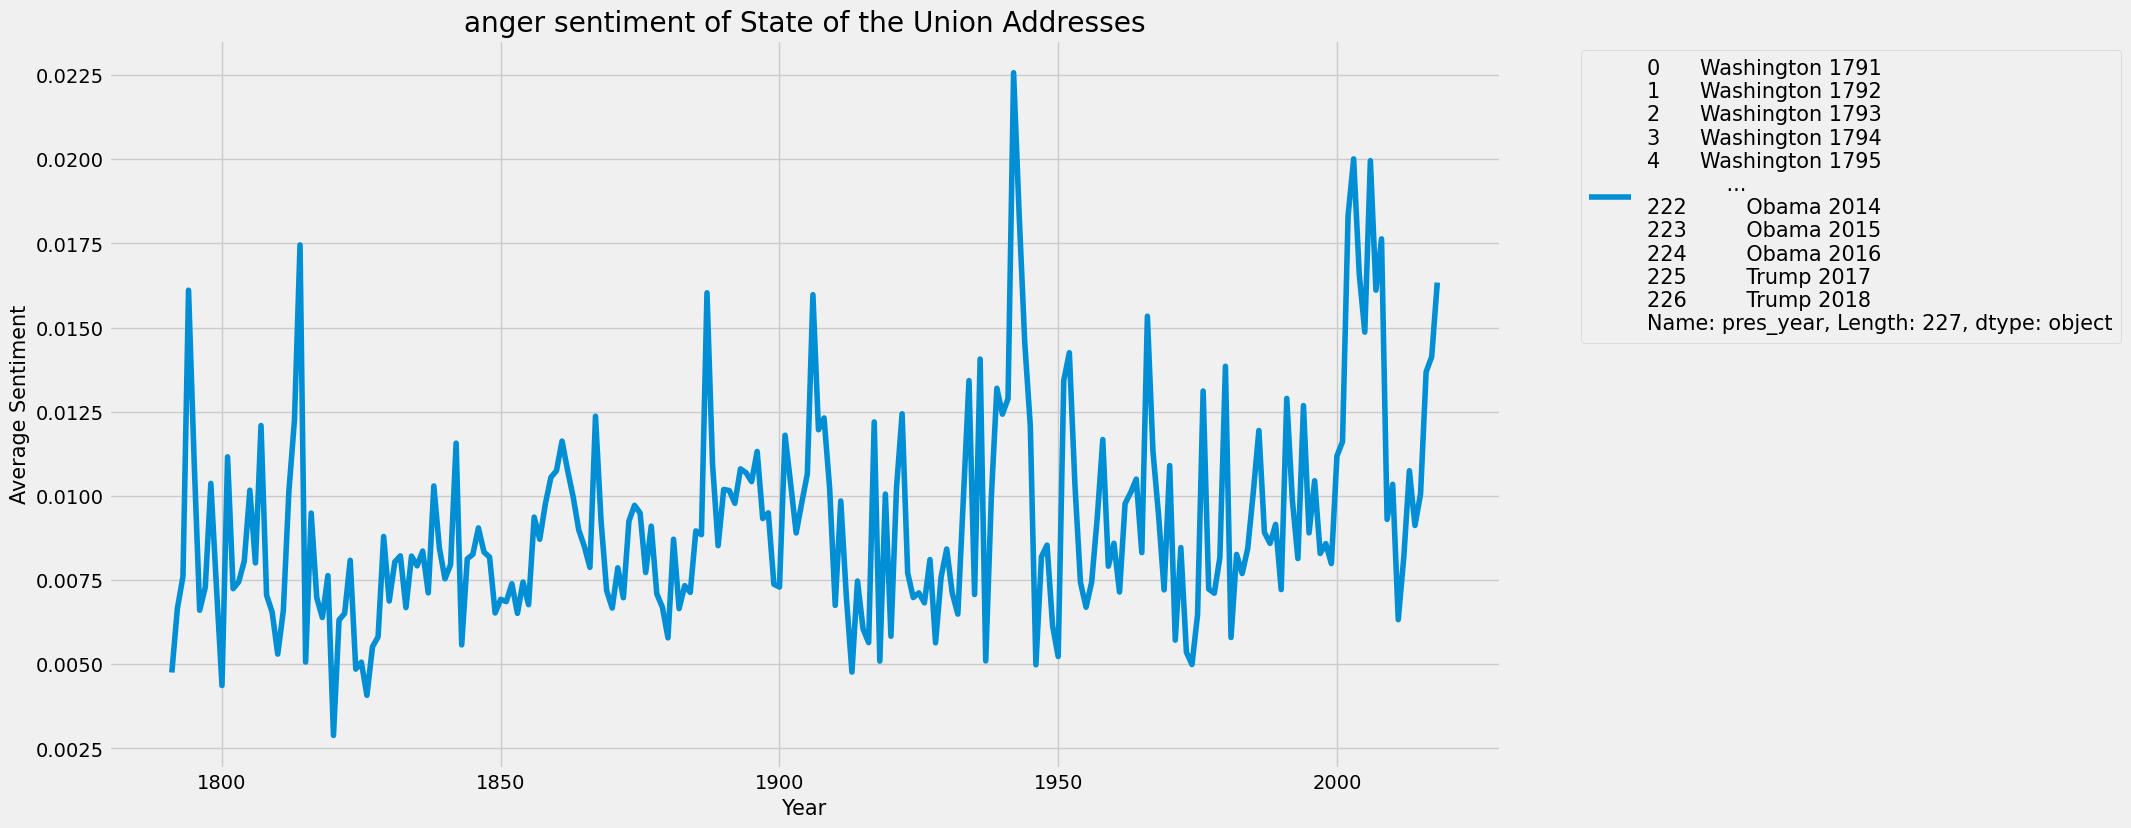

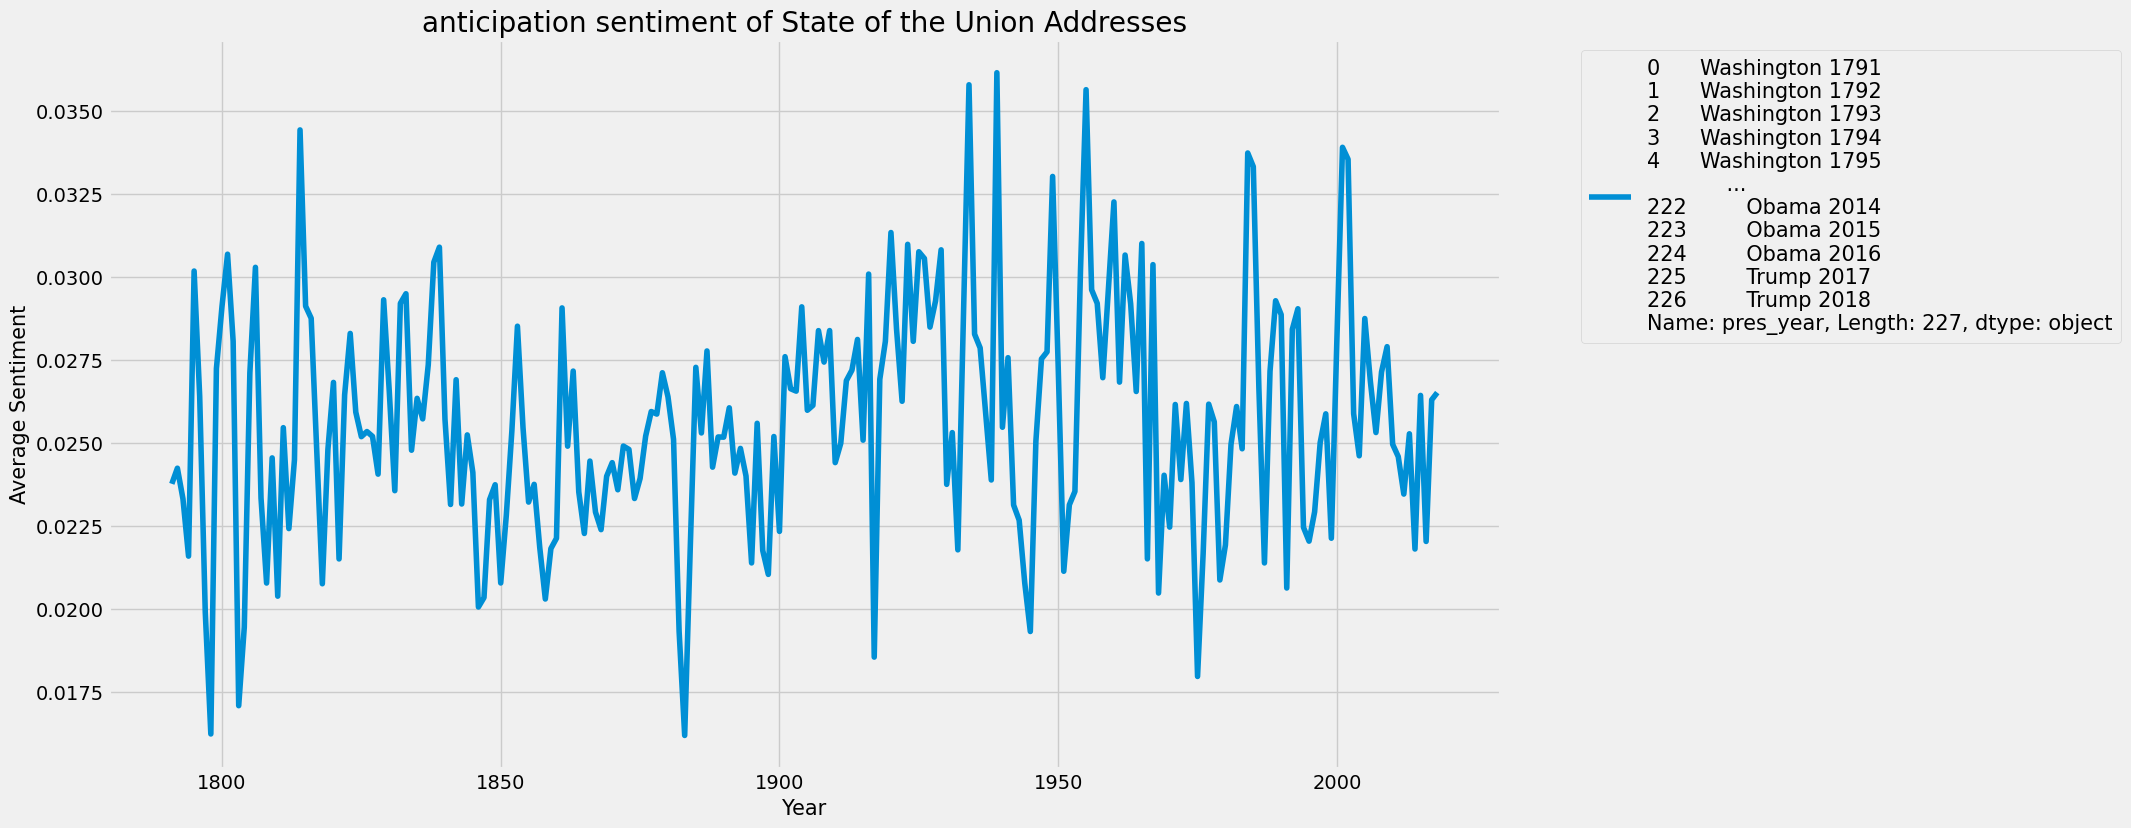

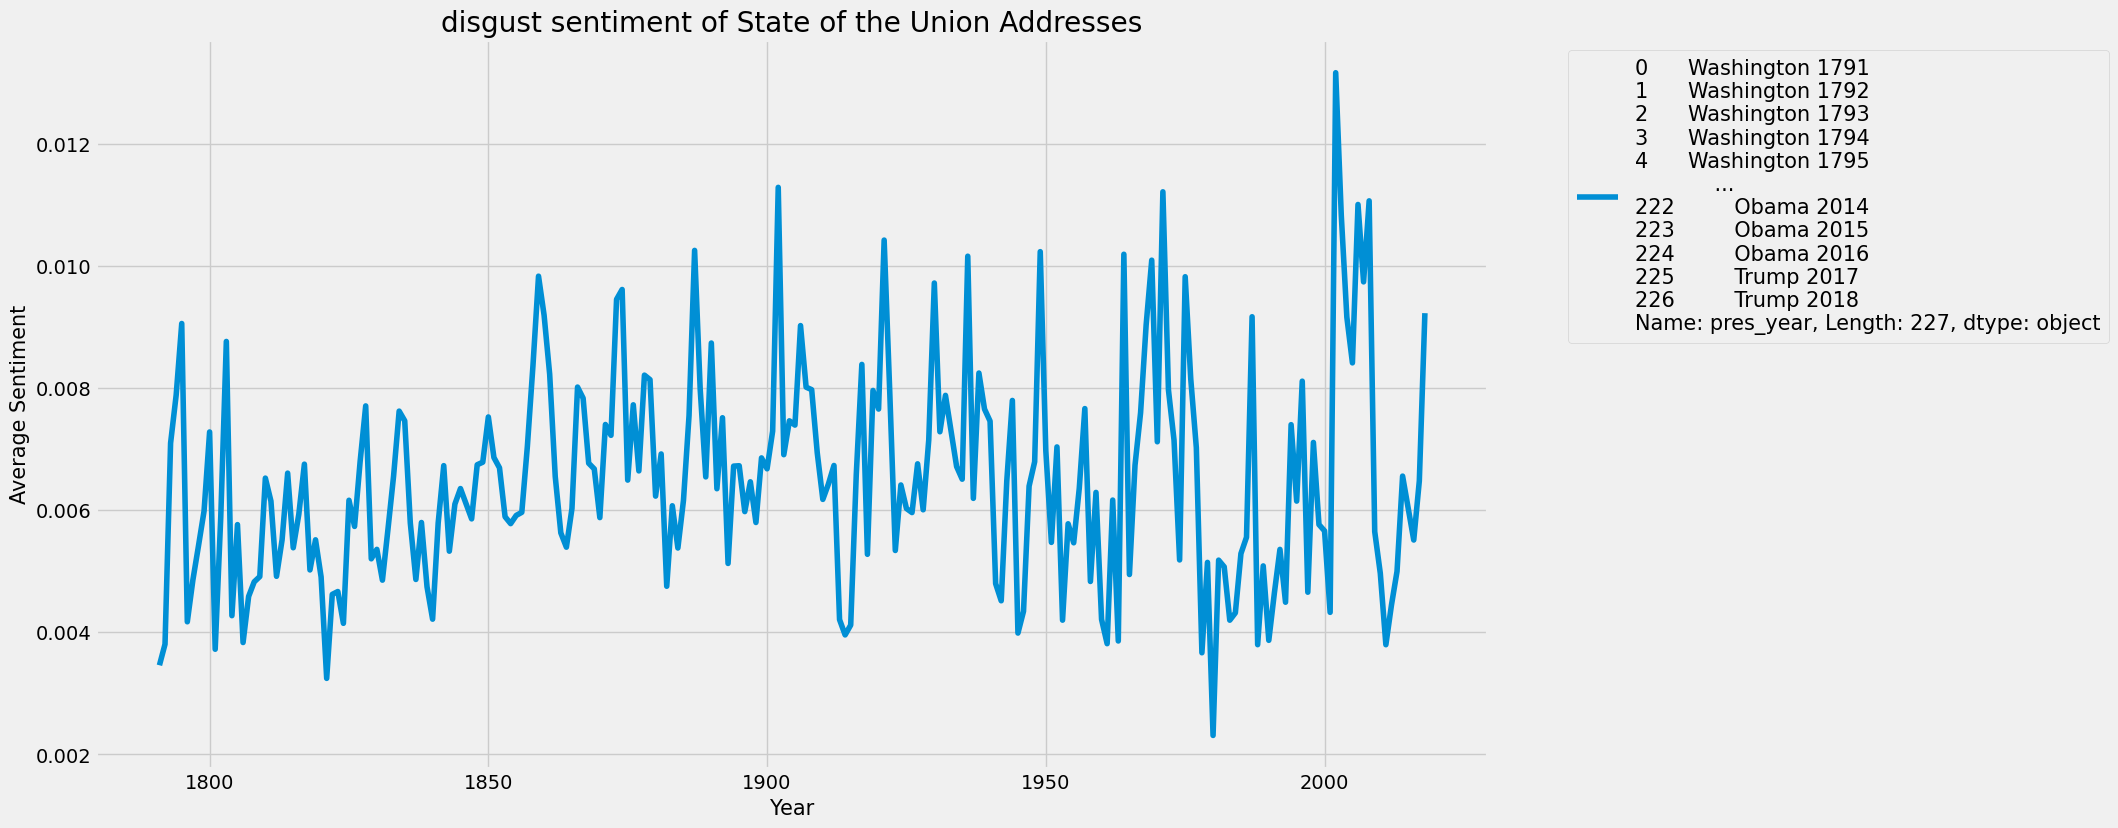

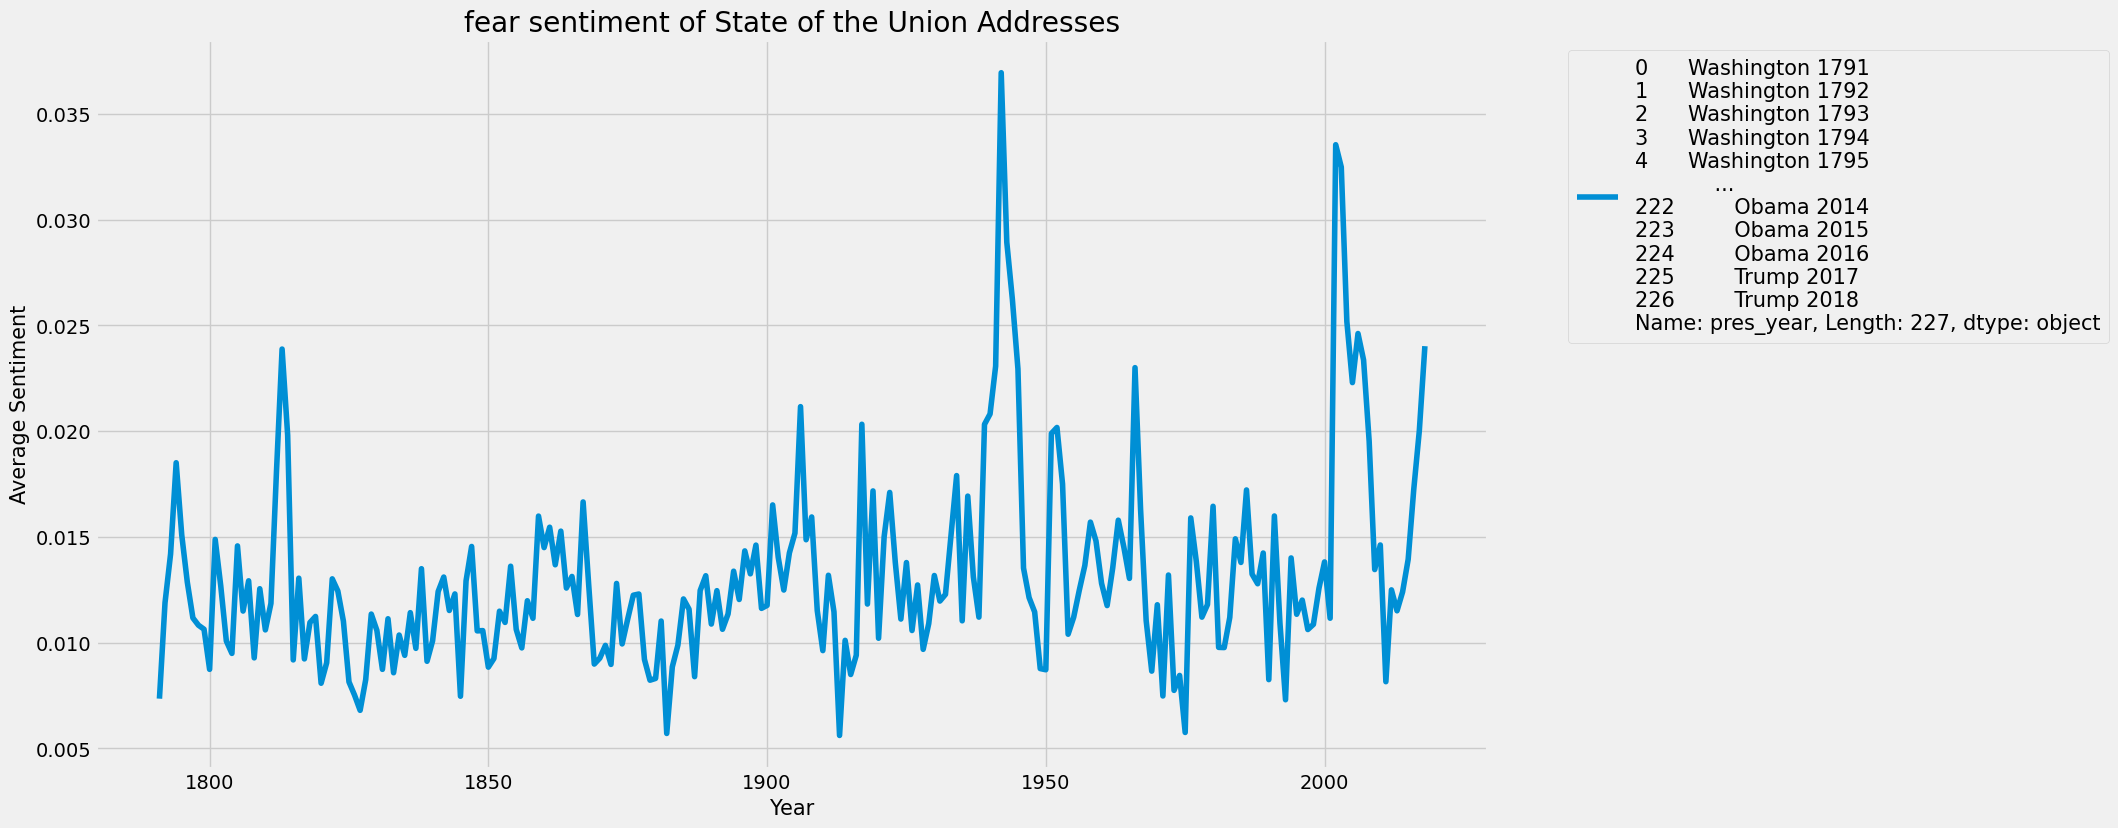

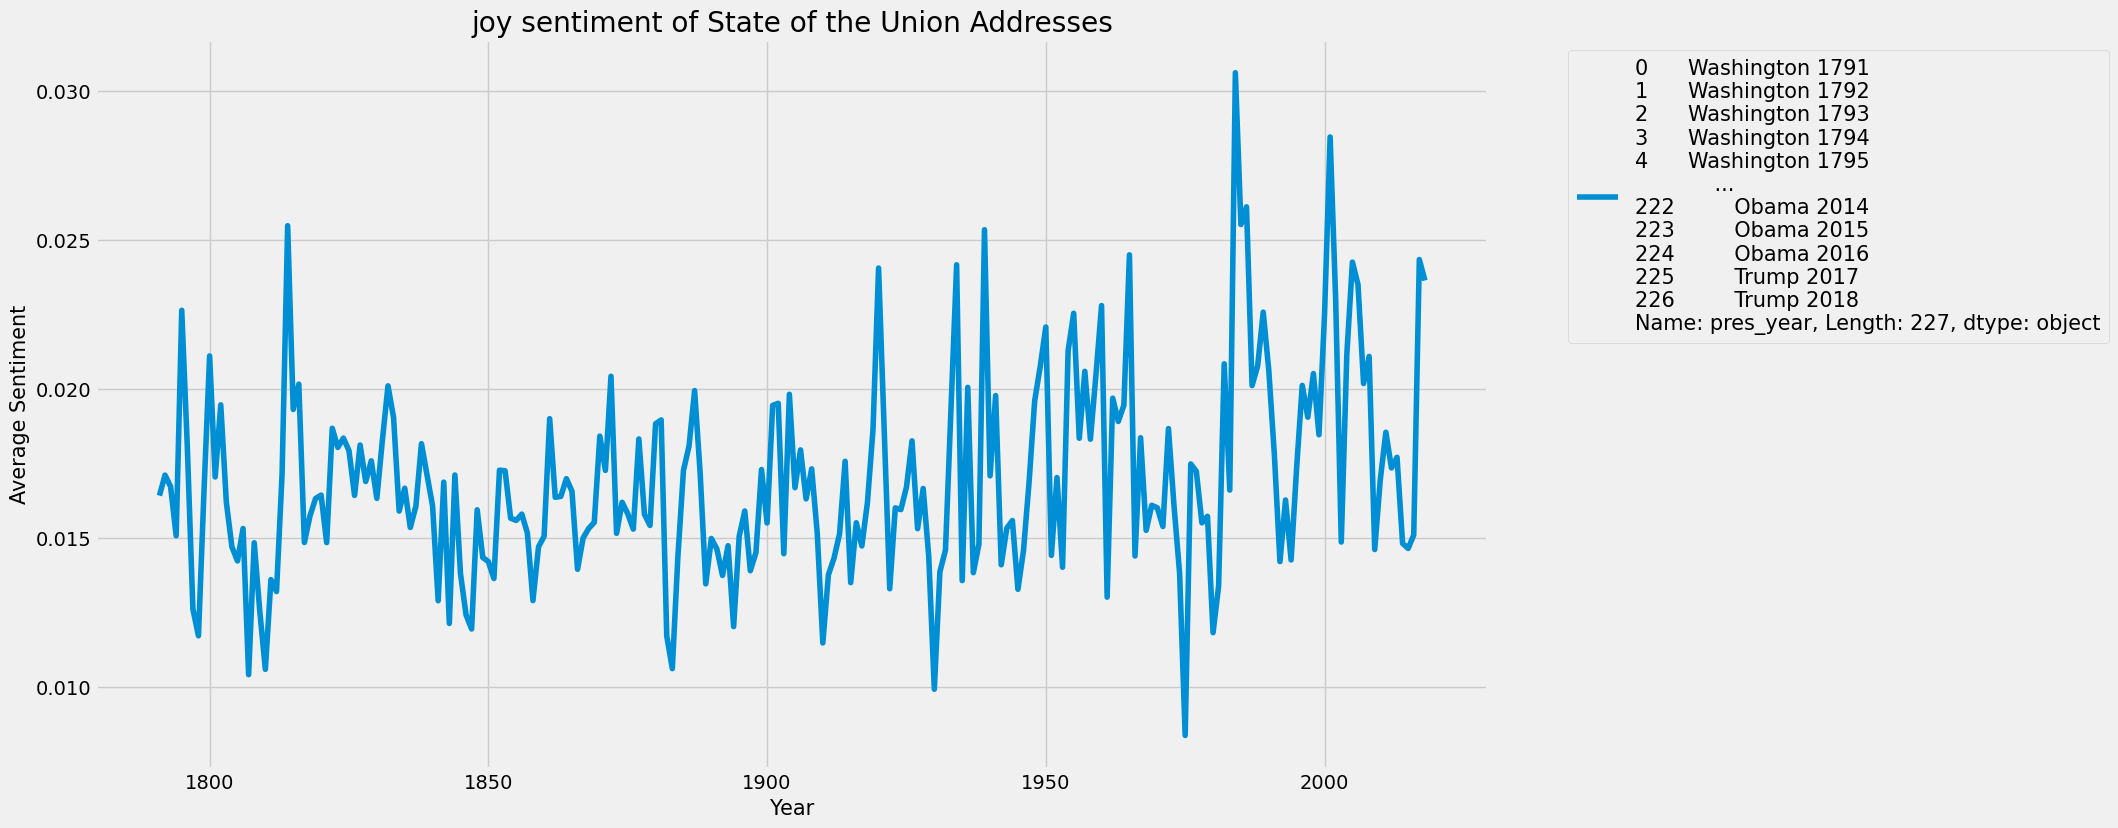

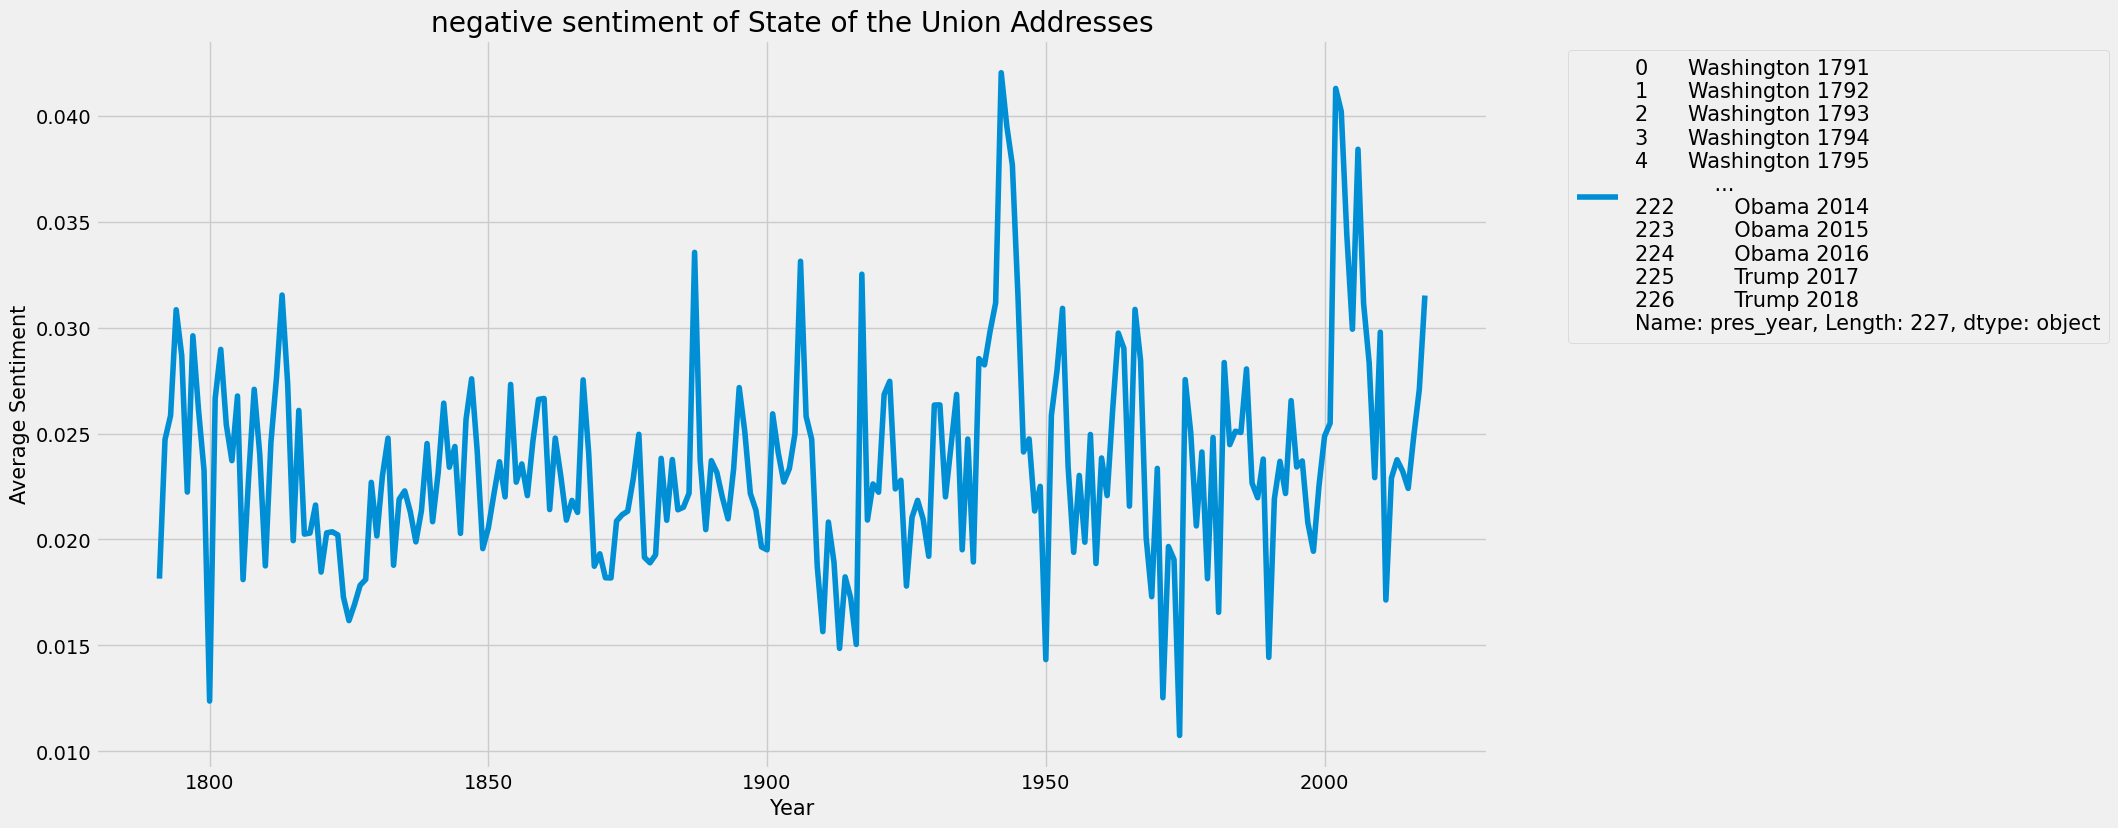

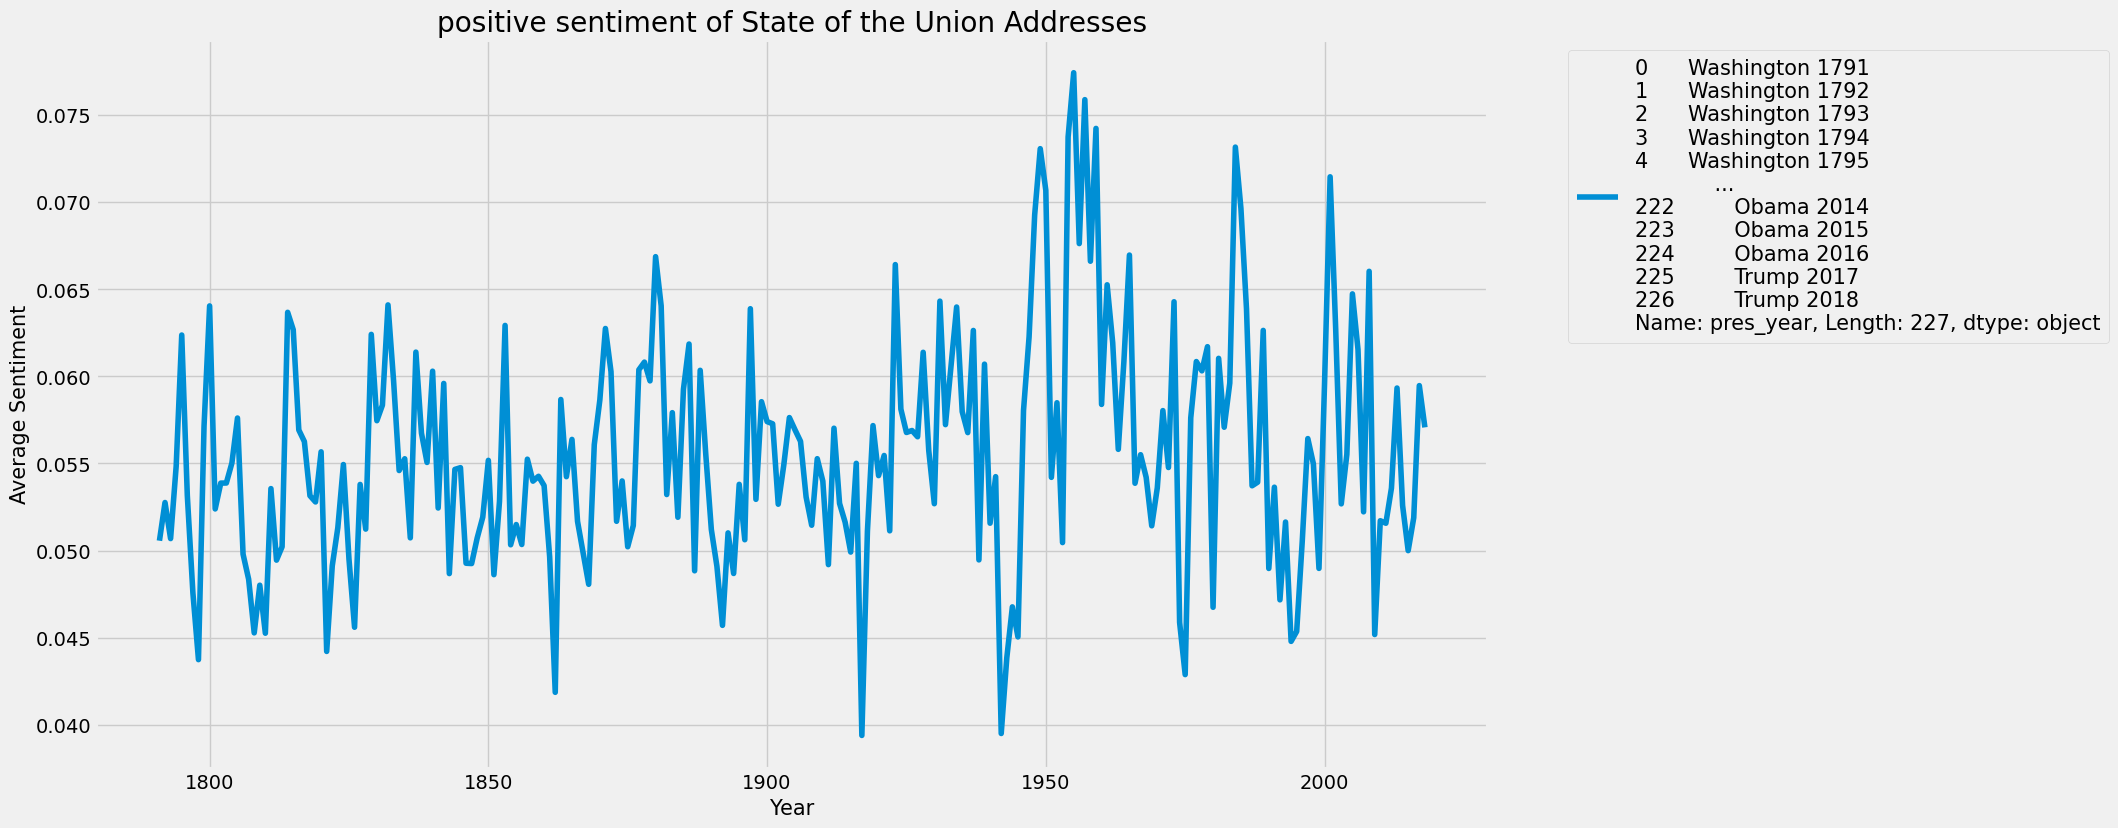

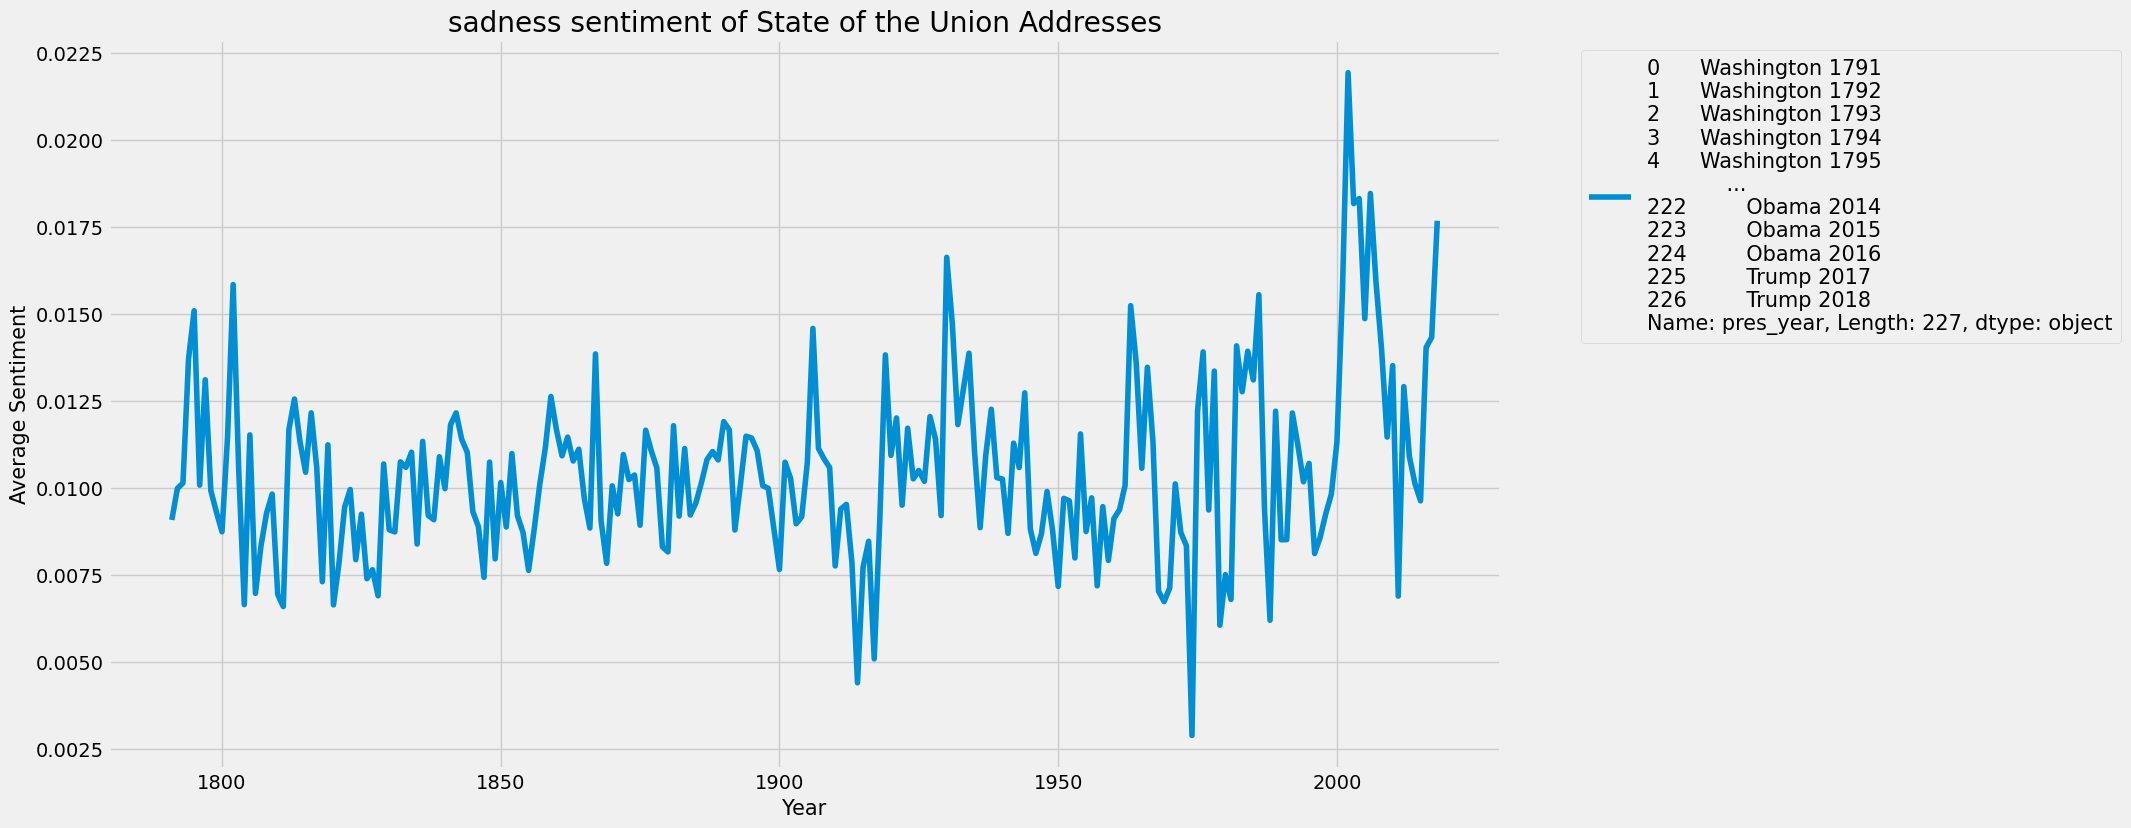

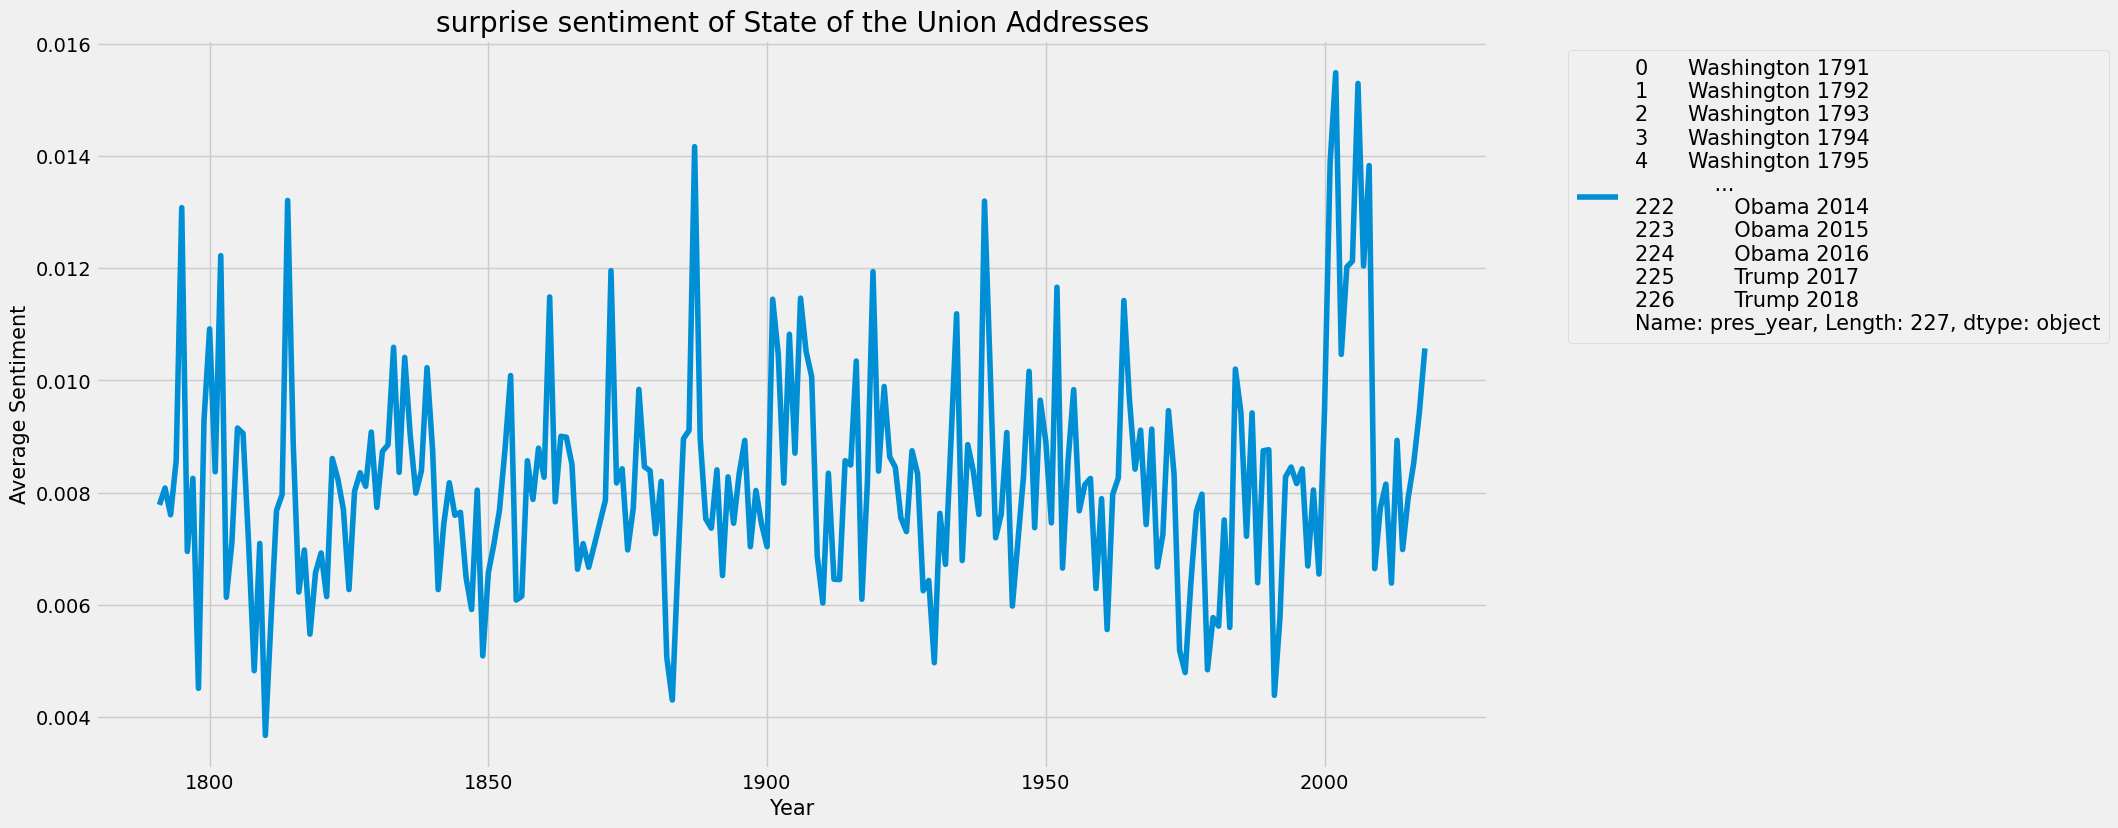

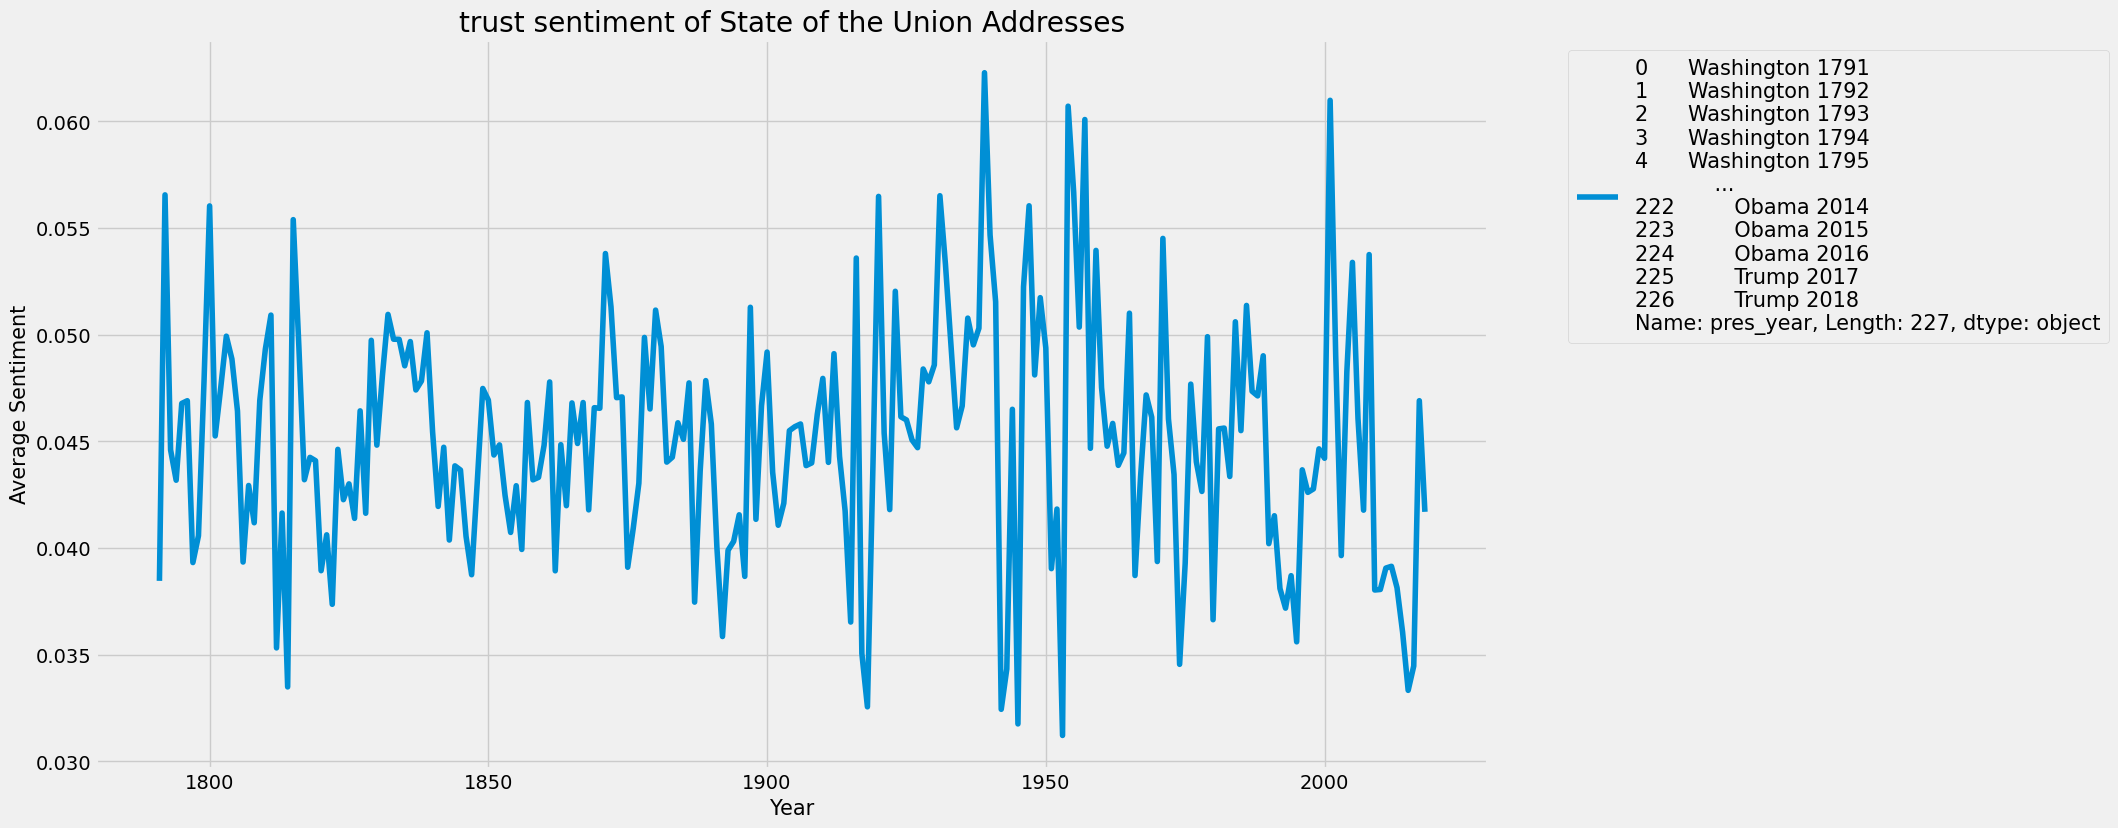

In [22]:
sotunrc2['pres_year'] = sotunrc2['pres']  + " " + sotunrc2['year'].astype(str)
# length = sum([len(sotudf3['word_count'])])
x = sotunrc2['year'].tolist()
for emotion in emotions:
    y = sotunrc2[emotion]
    plt.plot(x,y,label = sotunrc2['pres_year'])
    plt.title('{} sentiment of State of the Union Addresses'.format(emotion, fontsize=24))
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Average Sentiment', fontsize=15)
    plt.legend(loc='best', fontsize=15, bbox_to_anchor=(1.05, 1))
    plt.show()

In [23]:
sotunrc2["presnum"] = (sotunrc2["pres"] != sotunrc2["pres"].shift()).cumsum()
presdf = sotunrc2[["pres","year","presnum","pres_year"]]
presdf.to_csv("pres_sotulist.csv",encoding='utf-8')
presyears = presdf.groupby('presnum')['year'].apply(list)
print(presyears[-10:])

presnum
34                [1964, 1965, 1966, 1967, 1968, 1969]
35                      [1970, 1971, 1972, 1973, 1974]
36                                  [1975, 1976, 1977]
37                            [1978, 1979, 1980, 1981]
38          [1982, 1983, 1984, 1985, 1986, 1987, 1988]
39                            [1989, 1990, 1991, 1992]
40    [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000]
41    [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]
42    [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
43                                        [2017, 2018]
Name: year, dtype: object


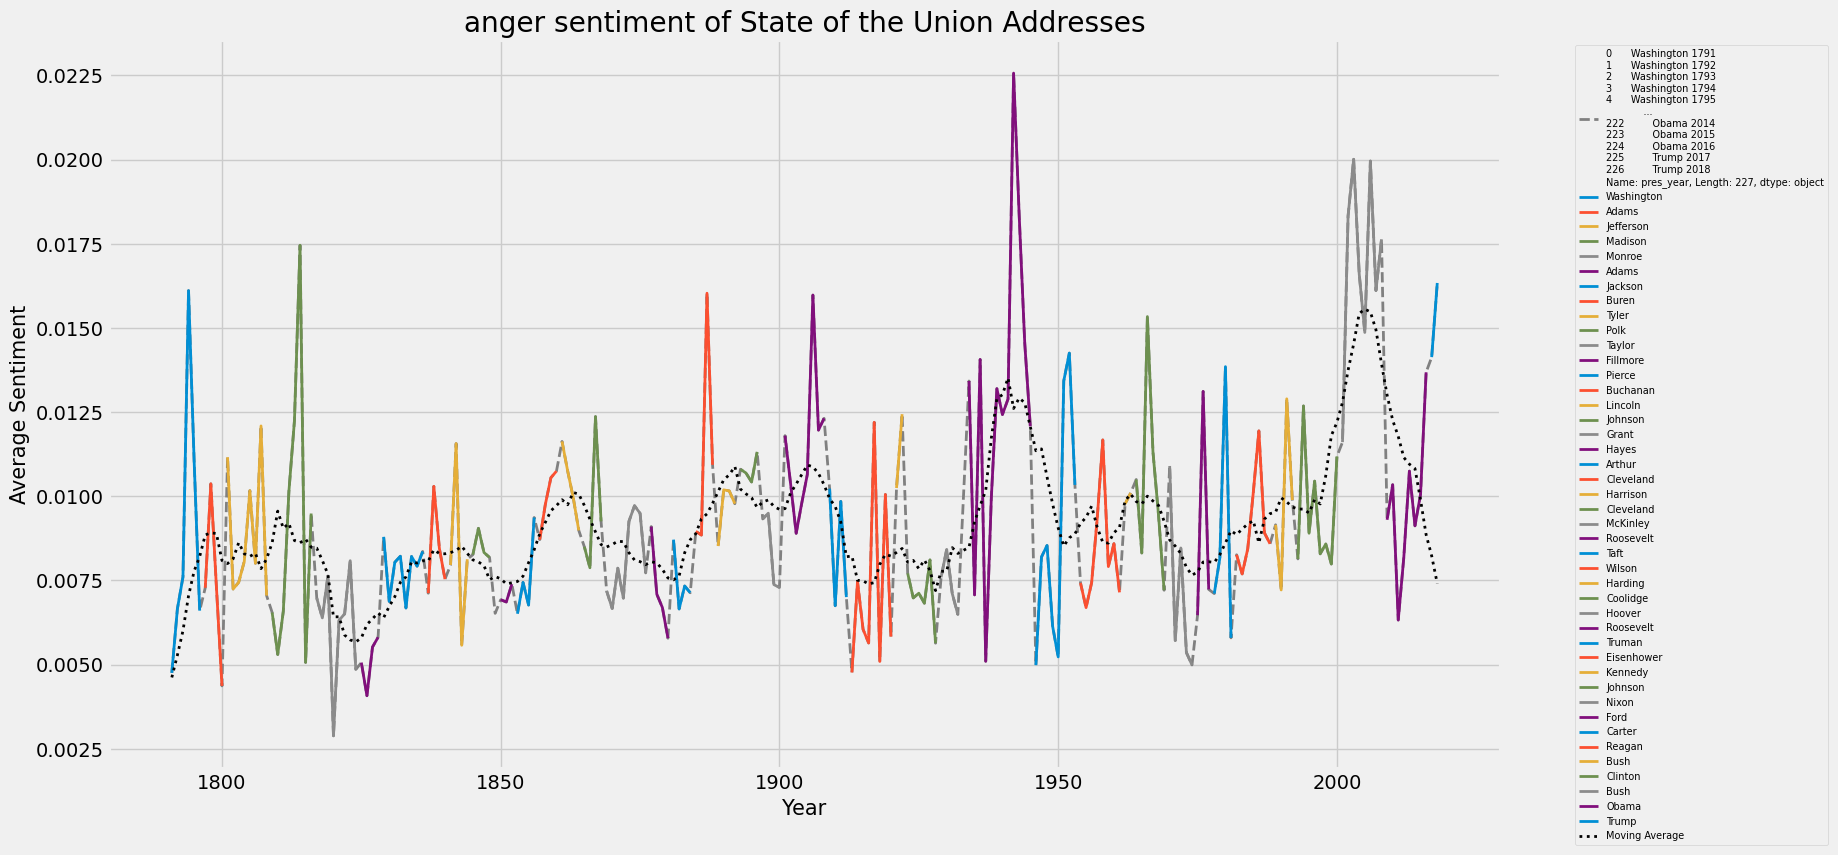

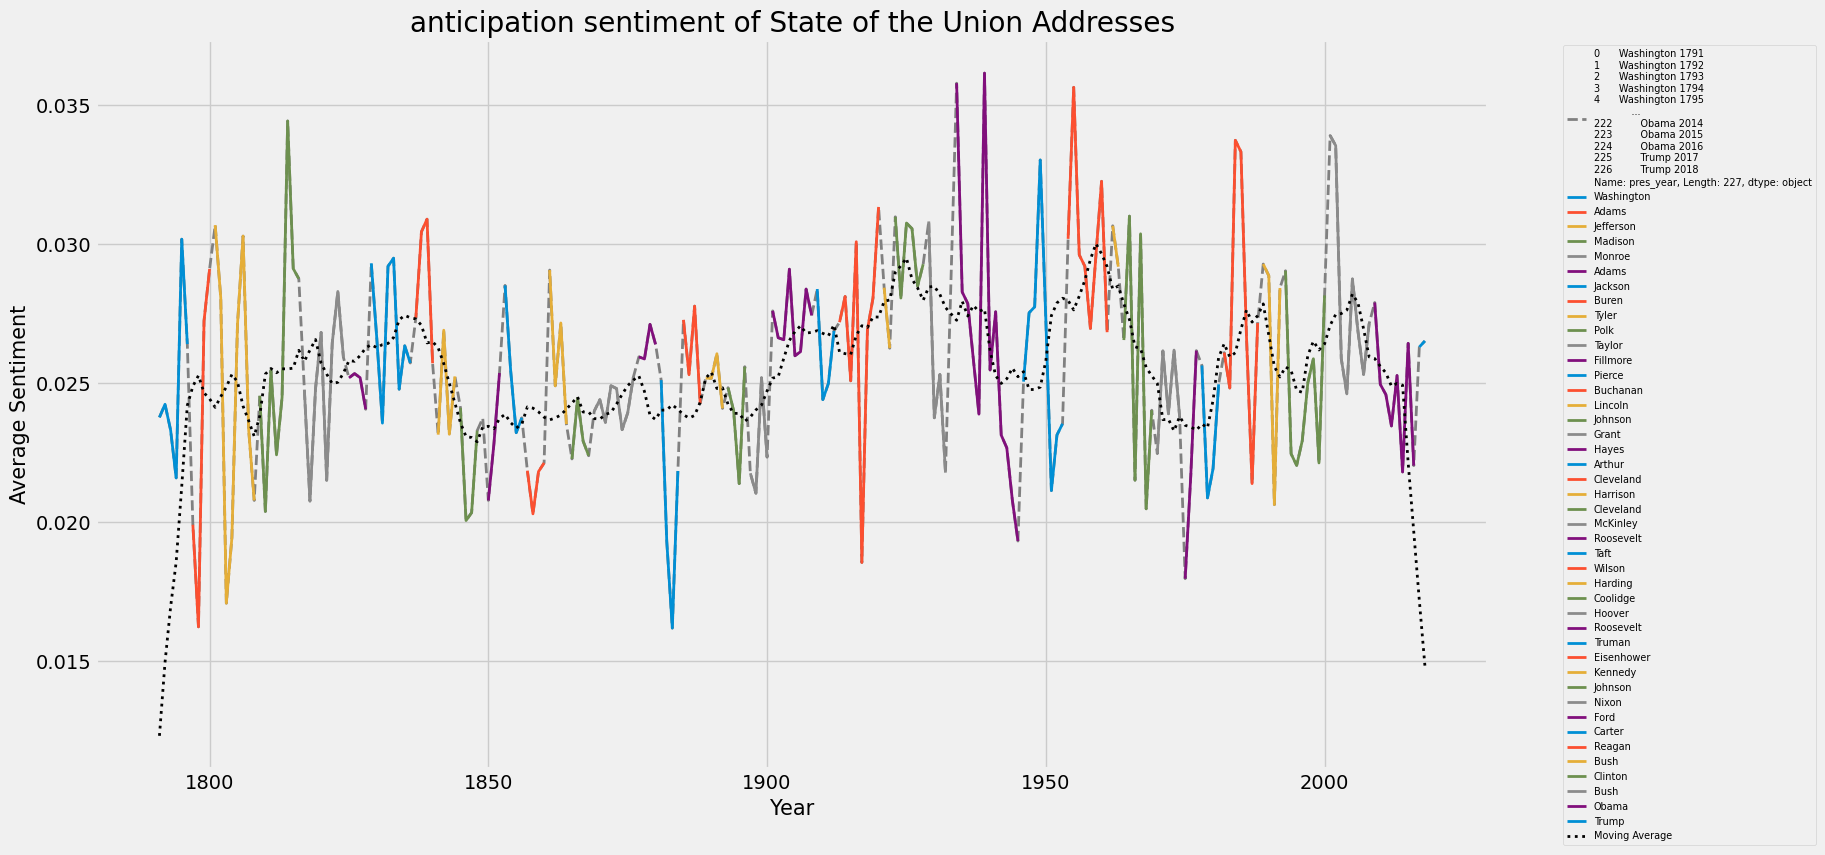

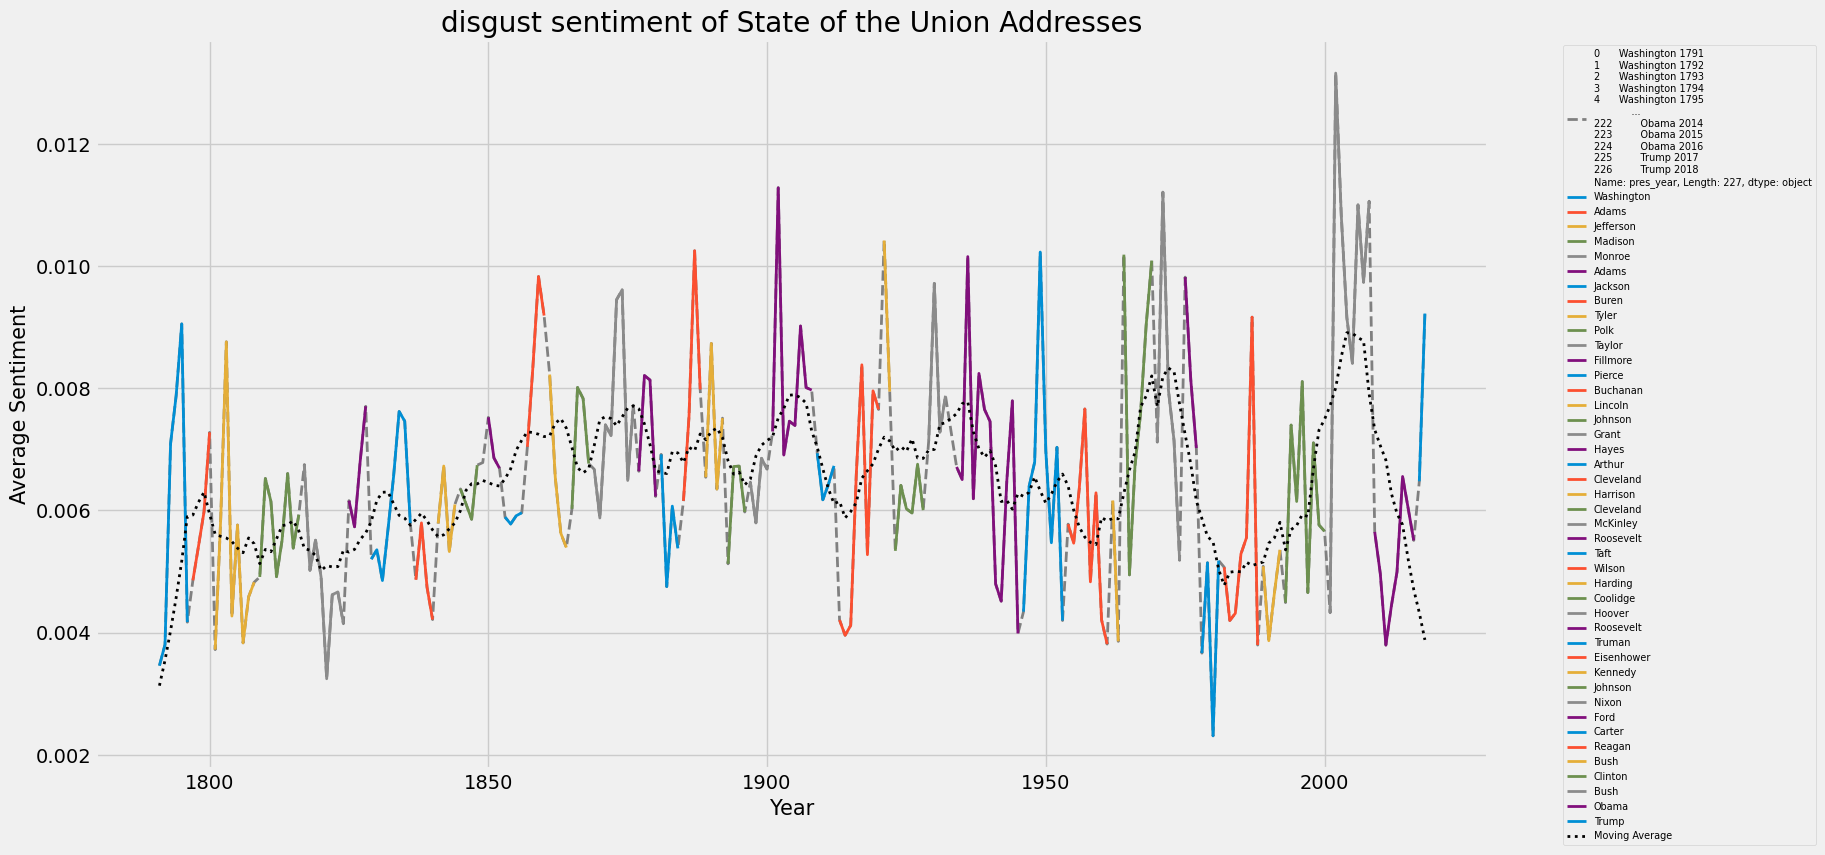

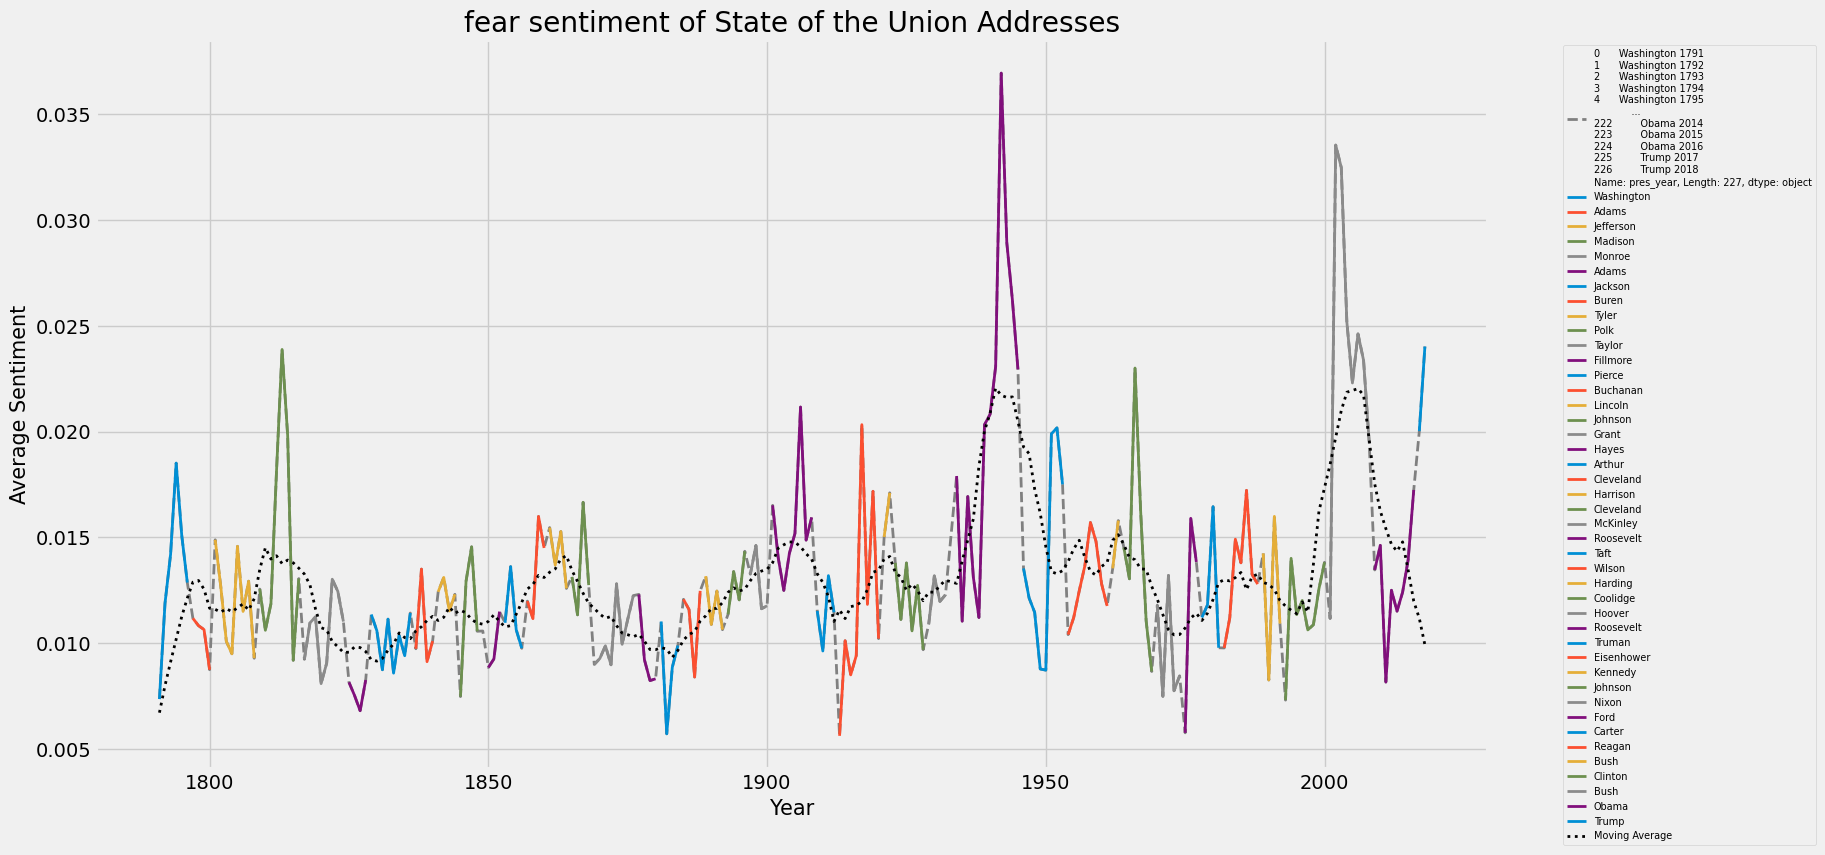

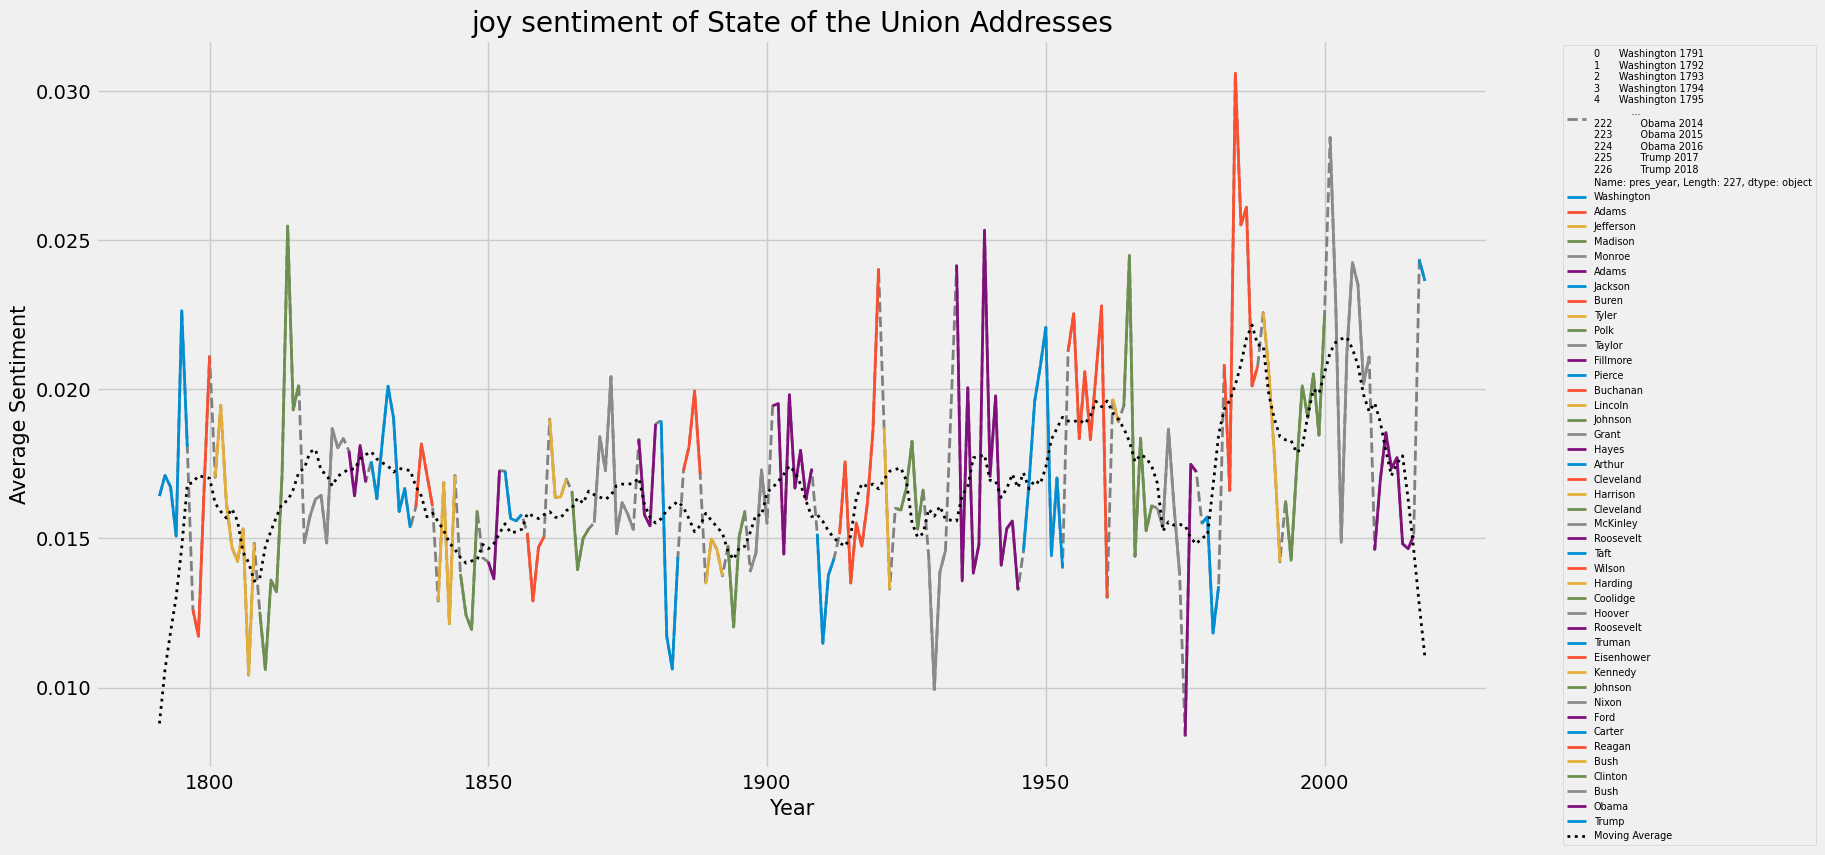

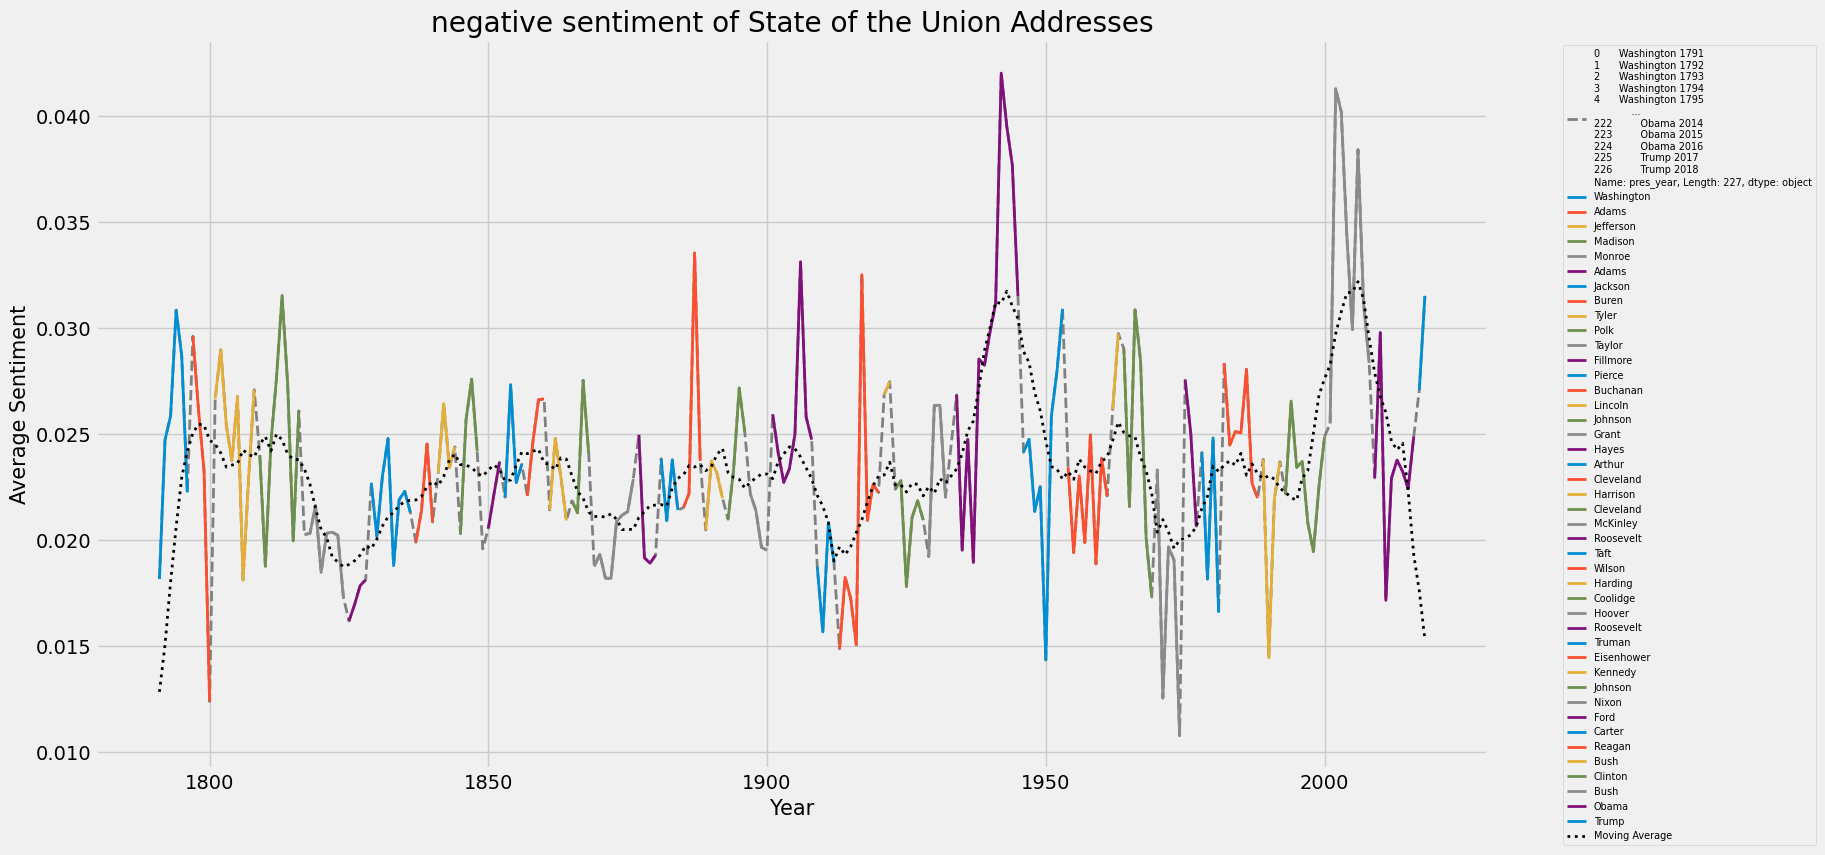

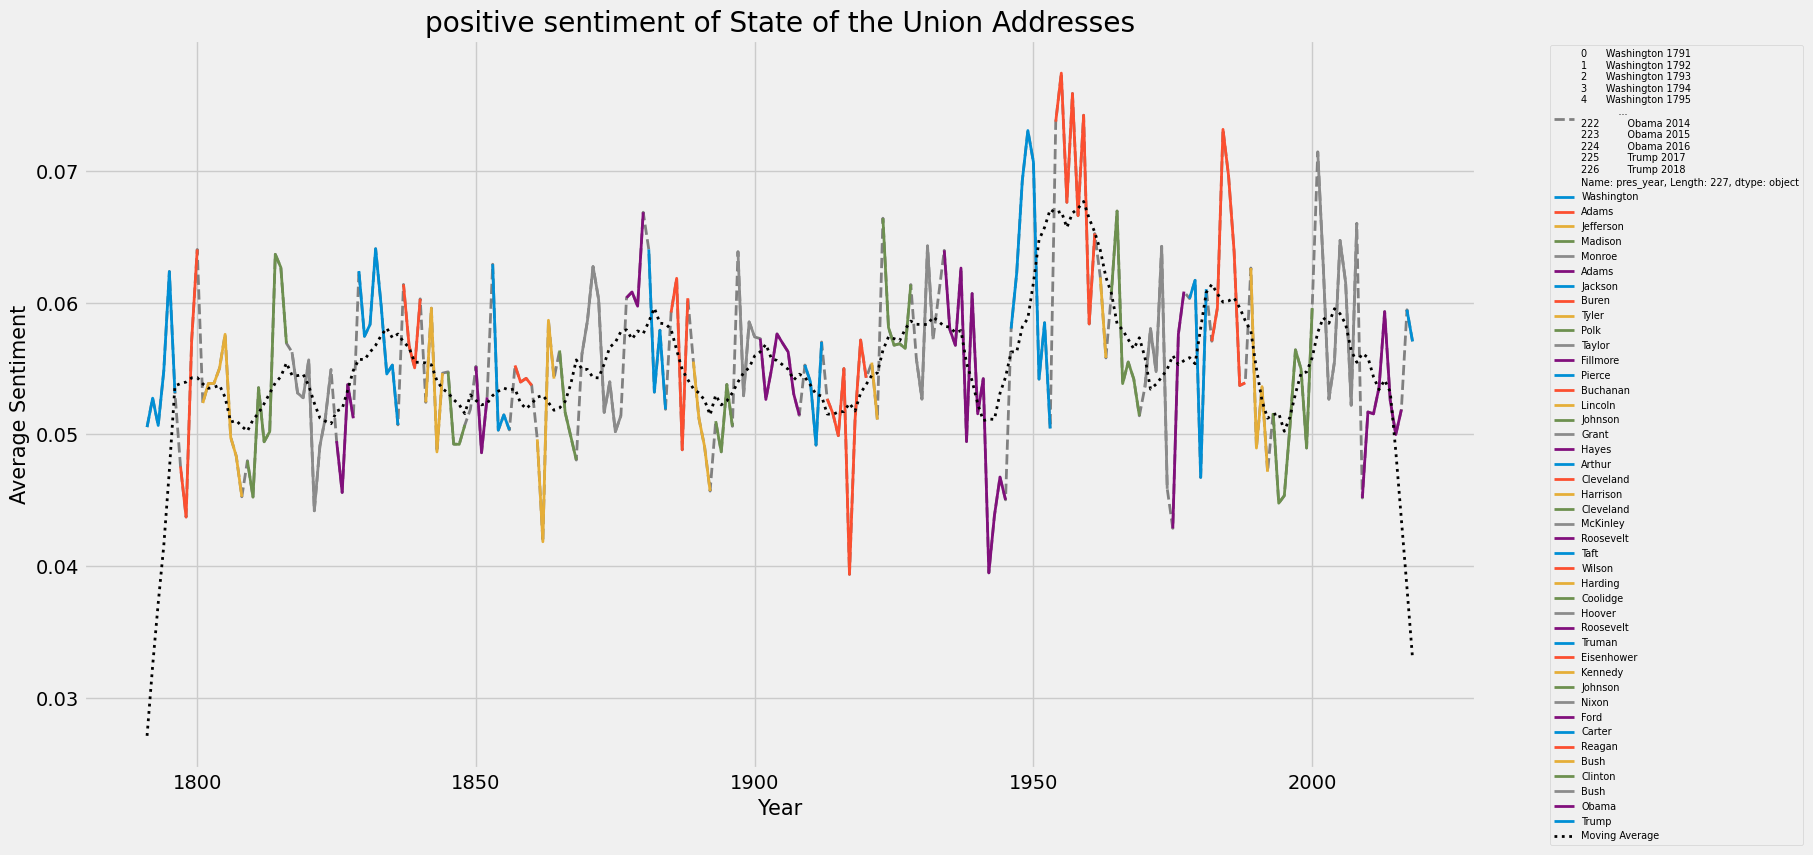

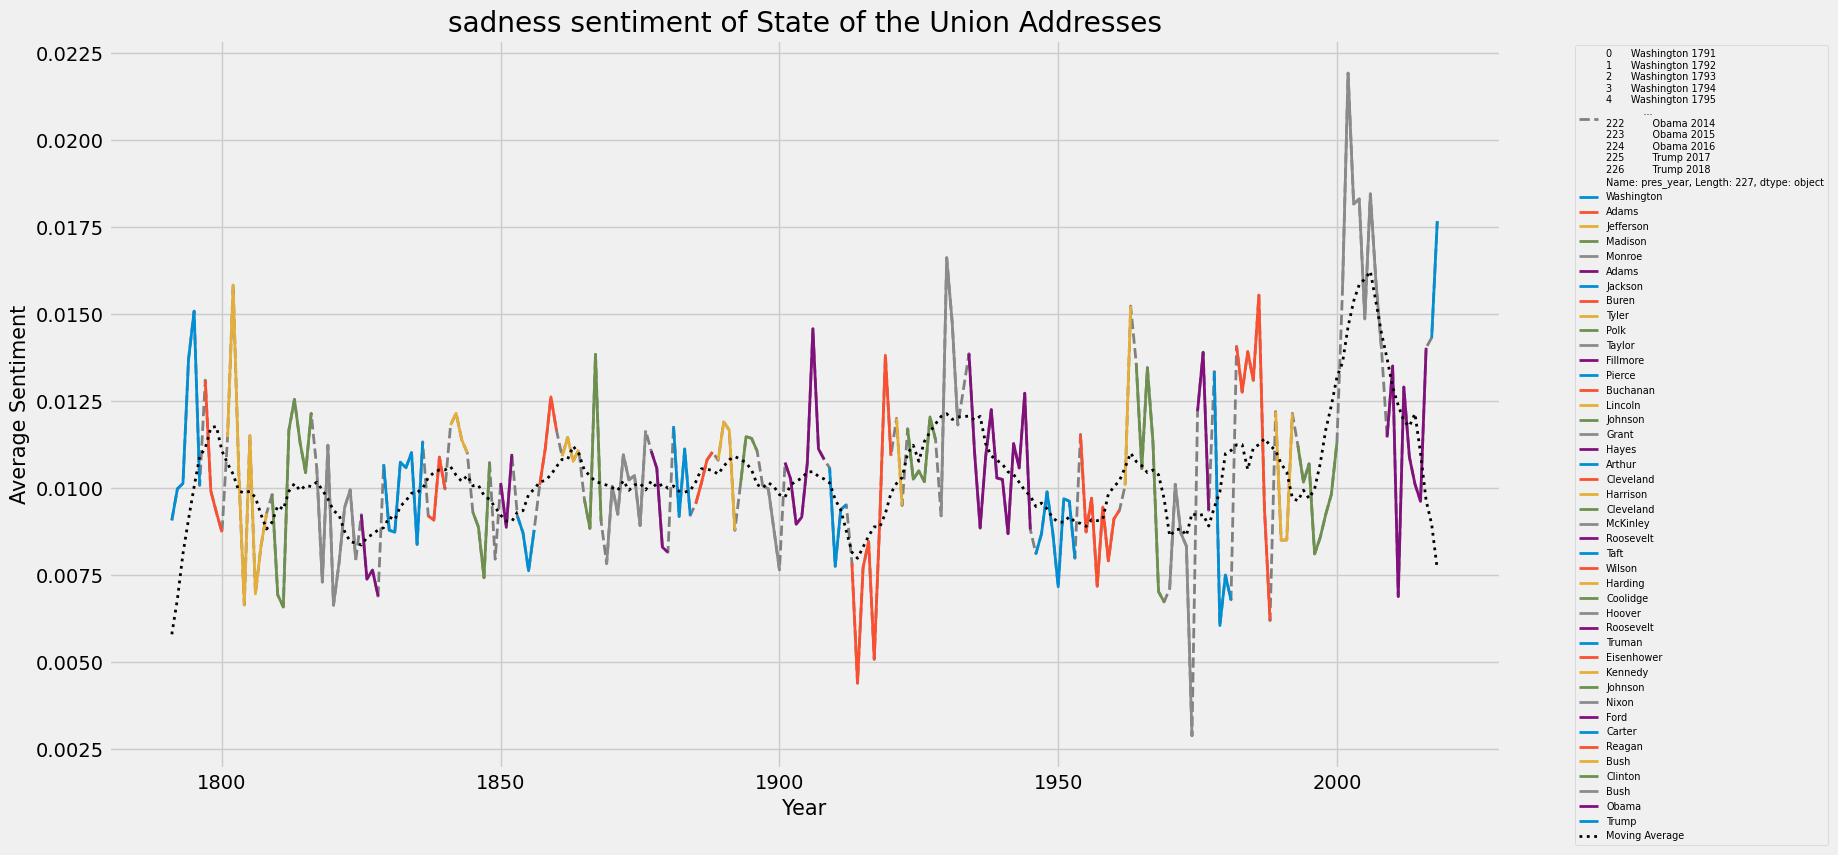

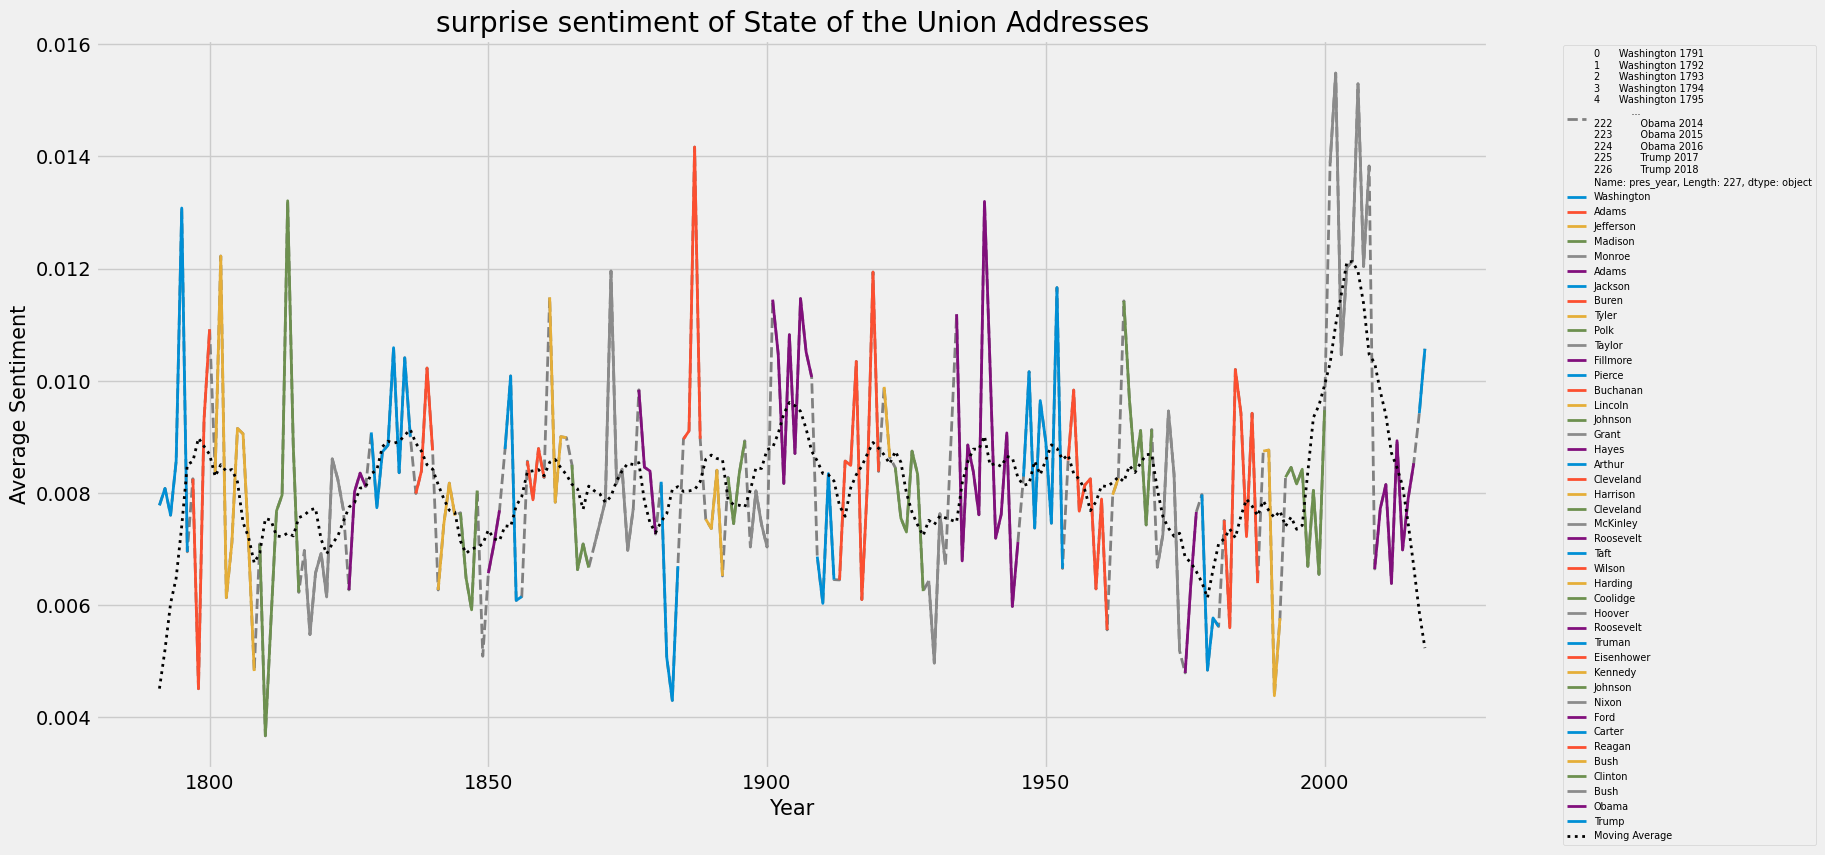

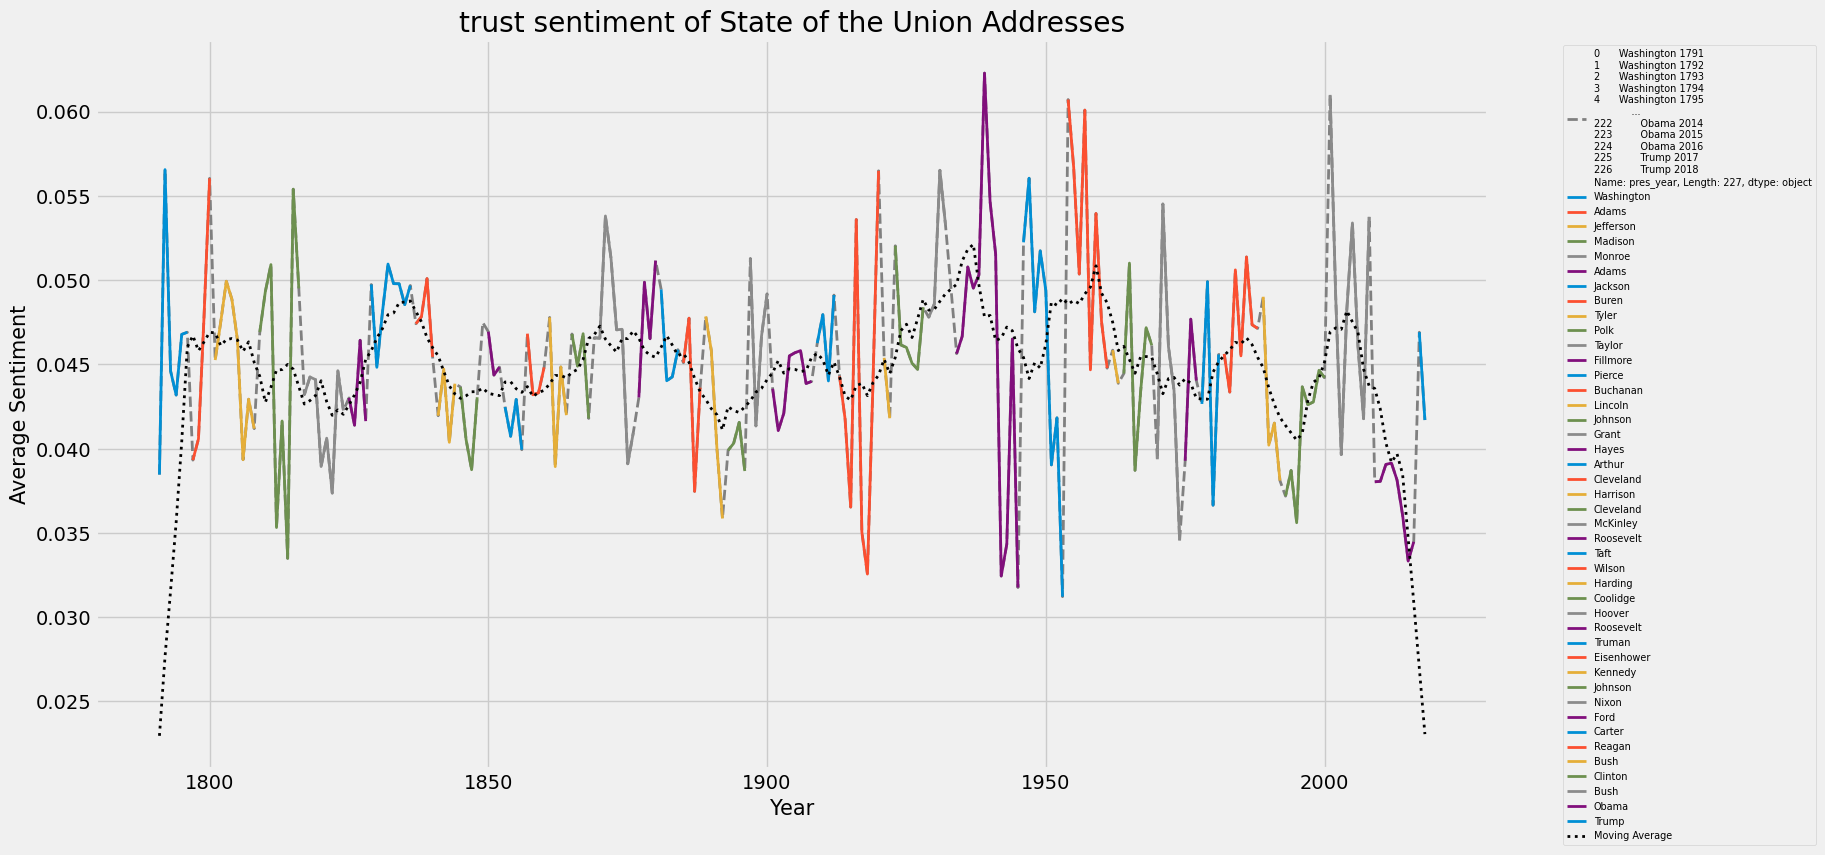

In [24]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

for emotion in emotions:
    fig,ax = plt.subplots()
    y = sotunrc2[emotion]
    ctr=0
    plt.plot(x,y,label = sotunrc2['pres_year'],linestyle = 'dashed',linewidth=2, color = 'gray')
    for presyrs in presyears:
        plt.plot(presyrs,y[ctr:ctr+len(presyrs)],label = sotunrc2.iloc[ctr]['pres'],linewidth=2)
        ctr+=len(presyrs)
    plt.plot(x,movingaverage(y, 10), color='k', linewidth=2, linestyle=':', label = 'Moving Average')
    plt.title('{} sentiment of State of the Union Addresses'.format(emotion, fontsize=24))
    plt.xlabel('Year', fontsize=15)
    plt.ylabel('Average Sentiment', fontsize=15)
    plt.legend(loc='best', fontsize=7, bbox_to_anchor=(1.05, 1))
    image_format = "png"
    image_name = "sotu_%s_sentiment.%s"%(emotion,image_format)
    fig.savefig(image_name, format=image_format, dpi = 300)
    plt.show()

C:\Users\F0040RP\AppData\Local\Temp\ipykernel_31024\244775042.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


NameError: name 'hp' is not defined

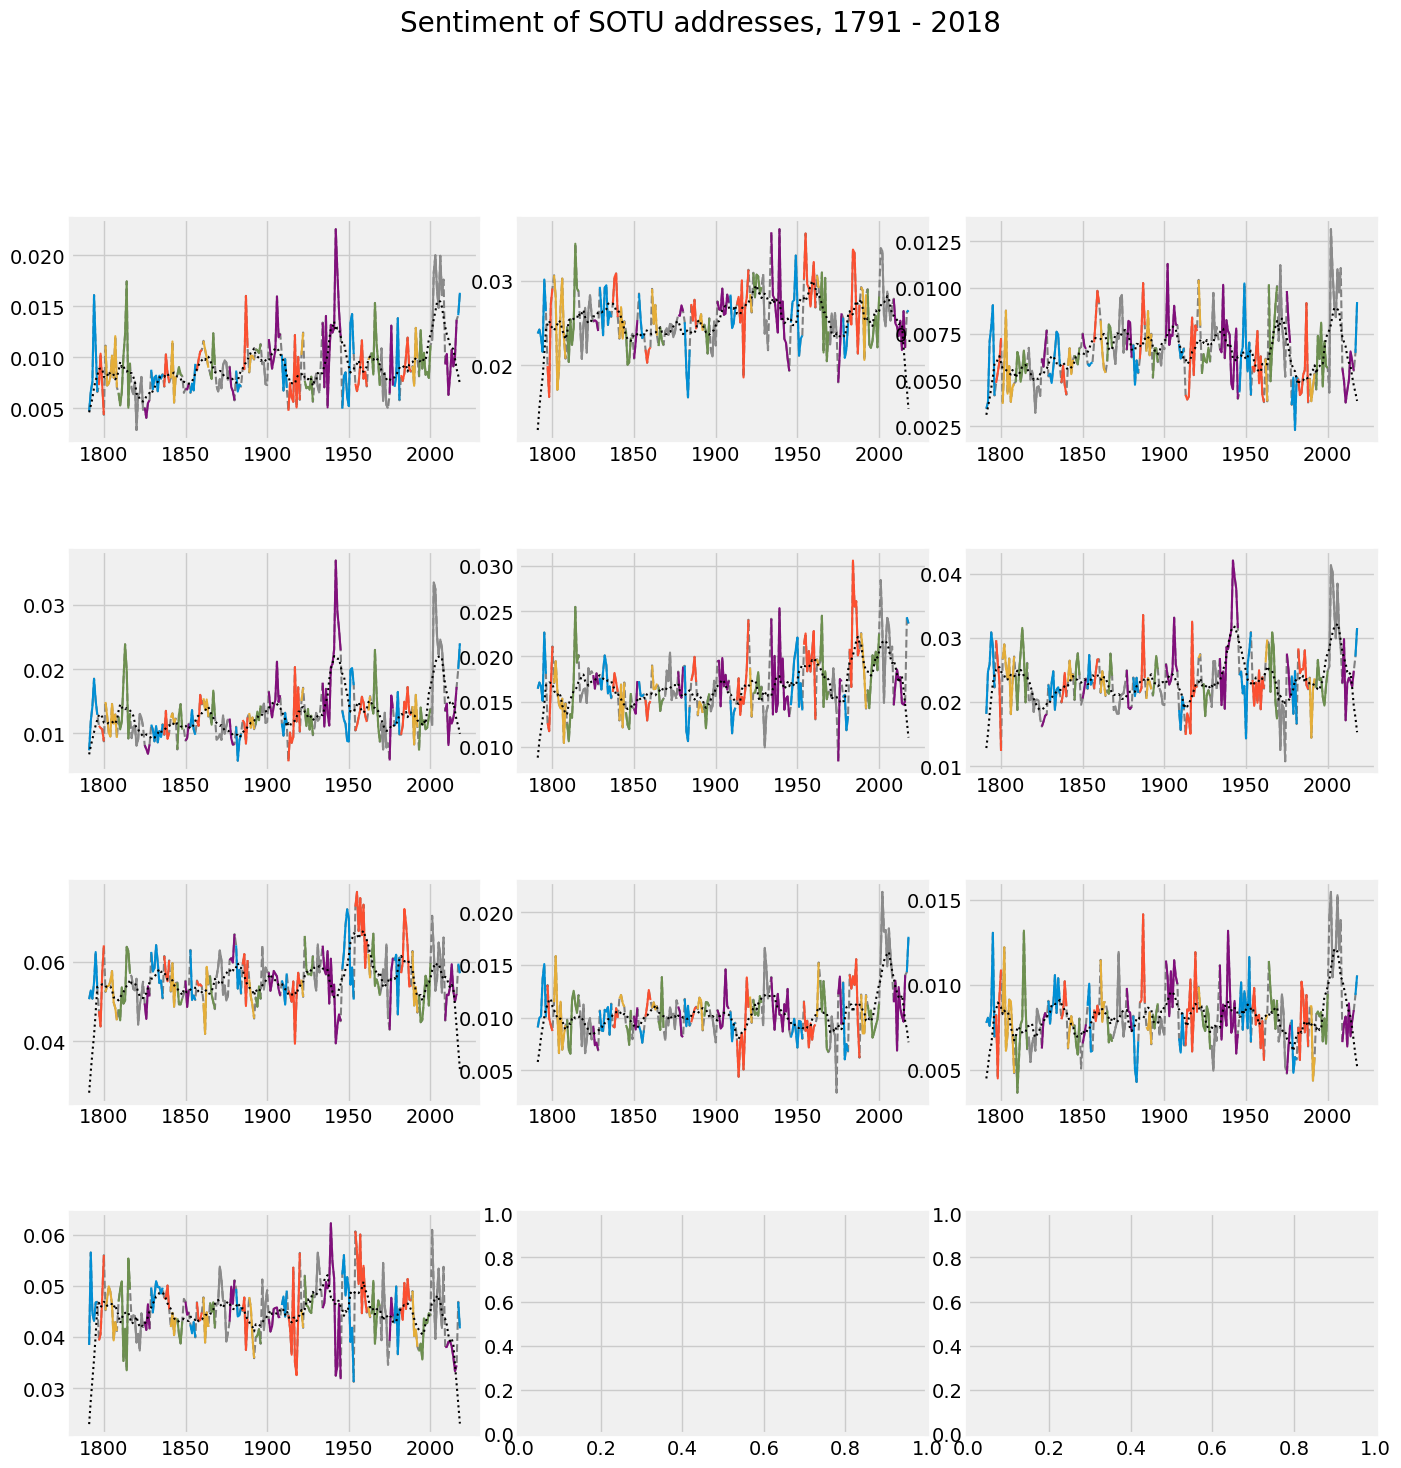

In [25]:
#length = sum([len(hp[book]) for book in hp])
#x = np.linspace(0, length - 1, num=length)

fig, ax = plt.subplots(4, 3, figsize=(15, 15), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.1)
fig.suptitle('Sentiment of SOTU addresses, 1791 - 2018', fontsize=20, y=1.02)
fig.subplots_adjust(top=0.88)

ax = ax.ravel()

for i, emotion in enumerate(emotions):
    #fig,ax = plt.subplots()
    y = sotunrc2[emotion]
    ctr=0
    ax[i].plot(x,y,label = sotunrc2['pres_year'],linestyle = 'dashed',linewidth=1.5, color = 'gray')
    for presyrs in presyears:
        ax[i].plot(presyrs,y[ctr:ctr+len(presyrs)],label = sotunrc2.iloc[ctr]['pres'],linewidth=1.5)
        ctr+=len(presyrs)
    ax[i].plot(x,movingaverage(y, 10), color='k', linewidth=1.5, linestyle=':', label = 'Moving Average')
    #ax[i].title('{} sentiment of State of the Union Addresses'.format(emotion, fontsize=24))
    #ax[i].xlabel('Year', fontsize=15)
    #ax[i].ylabel('Average Sentiment', fontsize=15)
    #ax[i].legend(loc='best', fontsize=7, bbox_to_anchor=(1.05, 1))
    image_format = "png"
    image_name = "sotu_%s_sentiment.%s"%(emotion,image_format)
    fig.savefig(image_name, format=image_format, dpi = 300)
    fig.show()

#for i, emotion in enumerate(emotions):
#    y = [hp_df.loc[book].loc[hp[book][chapter][0]][emotion] for book in hp for chapter in hp[book]]
#    for book in book_indices:
#        ax[i].plot(x[book_indices[book][0]: book_indices[book][1]],
#                 y[book_indices[book][0]: book_indices[book][1]],
#                 label=book, linewidth=2)
#
#    ax[i].set_title('{} Sentiment'.format(emotion.title()))
#    ax[i].set_xticks([])

fig.legend(list(hp), loc='upper right', fontsize=15, bbox_to_anchor=(.85, .2))
fig.tight_layout()
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
plt.show()

In [41]:
ax[i]

<AxesSubplot:>

## Topic Modeling: A Brief Introduction

1. XX

In [5]:
sotudir = Path(Path.cwd().parent,"state-of-the-union-dataset","txt")
pathlist = sotudir.glob("*.txt")
for path in pathlist:
    print(path)

C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\topics-and-emotions
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1790_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1791_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1792_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1793_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1794_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1795_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1796_Washington.txt
C:\Users\F0040RP\Documents\DartLib_RDS\textAnalysis\state-of-the-union-dataset\txt\1797_Adams.txt
C:\Users\F0040RP\Documents

For this topic modeling activity, I am following code published in Shashank Kapadia's article: [End to End Topic Modeling in Python](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0) (*Towards Data Science*, 2019). This code uses the gensim package.


Check coherence scores: https://medium.com/analytics-vidhya/topic-modeling-using-gensim-lda-in-python-48eaa2344920